In [1]:
import os
import numpy as np
from collections import defaultdict
from utils.constant import ViTExperiment
from utils.vit_util import identfy_tgt_misclf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

2025-04-22 16:59:21.445182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-22 16:59:21.511289: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-22 16:59:21.868375: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-04-22 16:59:21.868455: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

# Vscoreのマスターデータとなる辞書を作成
後の分析で特定の場合だけ見る，とかが楽なので．

In [2]:
tgt_ranks = [1, 2, 3, 4, 5]
misclf_types = ["src_tgt", "tgt", ("tgt", "fp"), ("tgt", "fn")]
sample_types = ["cor", "mis"]
pretrained_dir = ViTExperiment.c100.OUTPUT_DIR.format(k=0) # /src/out_vit_c100_fold0
misclf_info_dir = os.path.join(pretrained_dir, "misclf_info")

In [3]:
def load_vscores(pretrained_dir, misclf_info_dir, tgt_ranks, misclf_types, abs, covavg):
    """
    各種 vscore ファイルを読み込み、defaultdict に格納して返す。

    Parameters:
        pretrained_dir (str): 対象モデルのディレクトリパス
        misclf_info_dir (str): misclf 情報のあるディレクトリ
        tgt_ranks (list[int]): 対象ランクのリスト
        misclf_types (list[Union[str, Tuple[str, str]]]): misclf種別（"src_tgt", "tgt", "tgt_fp", "tgt_fn"）またはそのタプル

    Returns:
        defaultdict: {(tgt_rank, misclf_type, "cor" or "mis"): np.ndarray}
    """
    result = defaultdict(lambda: None)
    
    vscore_path_prefix = ("vscore_abs" if abs else "vscore") + ("_covavg" if covavg else "")

    for tgt_rank in tgt_ranks:
        vscore_dir = os.path.join(pretrained_dir, f"misclf_top{tgt_rank}", "vscores")
        
        for misclf_type_raw in misclf_types:
            if isinstance(misclf_type_raw, tuple):
                misclf_type, fpfn = misclf_type_raw
            else:
                misclf_type, fpfn = misclf_type_raw, None

            # print(f"\n[tgt_rank={tgt_rank}, misclf_type={misclf_type}, fpfn={fpfn}]")

            misclf_pair, tgt_label, tgt_mis_indices = identfy_tgt_misclf(
                misclf_info_dir, tgt_split="repair", misclf_type=misclf_type,
                tgt_rank=tgt_rank, fpfn=fpfn
            )

            # ファイル名を構築
            cor_vscore_file = f"{vscore_path_prefix}_l1tol12_all_label_ori_repair_cor.npy"

            if misclf_type == "src_tgt":
                mis_vscore_file = f"{vscore_path_prefix}_l1tol12_{misclf_pair[0]}to{misclf_pair[1]}_ori_repair_mis.npy"
            elif fpfn is not None:
                mis_vscore_file = f"{vscore_path_prefix}_l1tol12_{tgt_label}_ori_repair_{fpfn}_mis.npy"
            else:
                mis_vscore_file = f"{vscore_path_prefix}_l1tol12_{tgt_label}_ori_repair_mis.npy"

            # パスを構築
            cor_vscore_path = os.path.join(vscore_dir, cor_vscore_file)
            mis_vscore_path = os.path.join(vscore_dir, mis_vscore_file)

            # ロード
            cor_vscore = np.load(cor_vscore_path)
            mis_vscore = np.load(mis_vscore_path)

            # 格納
            key_base = (tgt_rank, misclf_type_raw)  # rawのまま使うことで呼び出し側で区別しやすく
            result[key_base + ("cor",)] = cor_vscore
            result[key_base + ("mis",)] = mis_vscore

    return result

len(result)=40
tgt_rank=1, misclf_type=src_tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


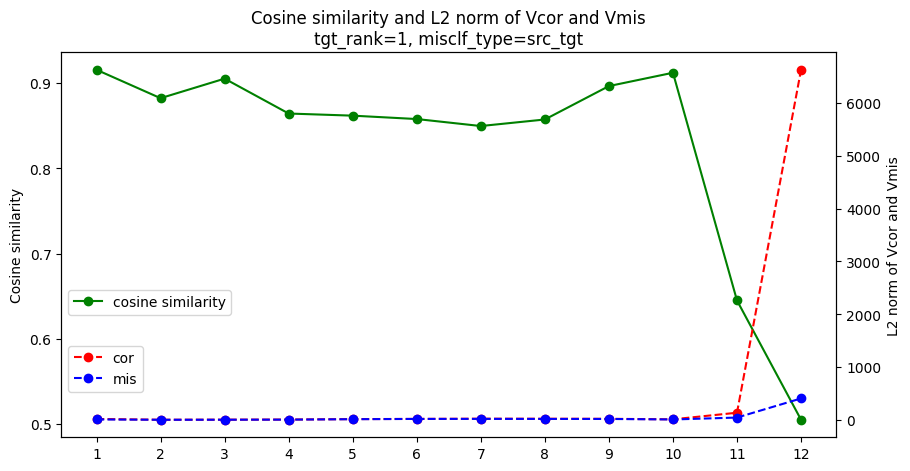

tgt_rank=1, misclf_type=tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


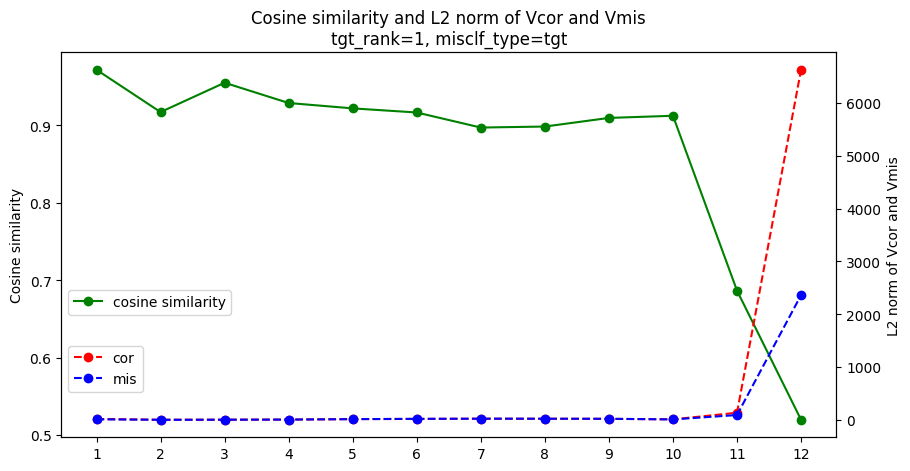

tgt_rank=1, misclf_type=tgt, fpfn=fp
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


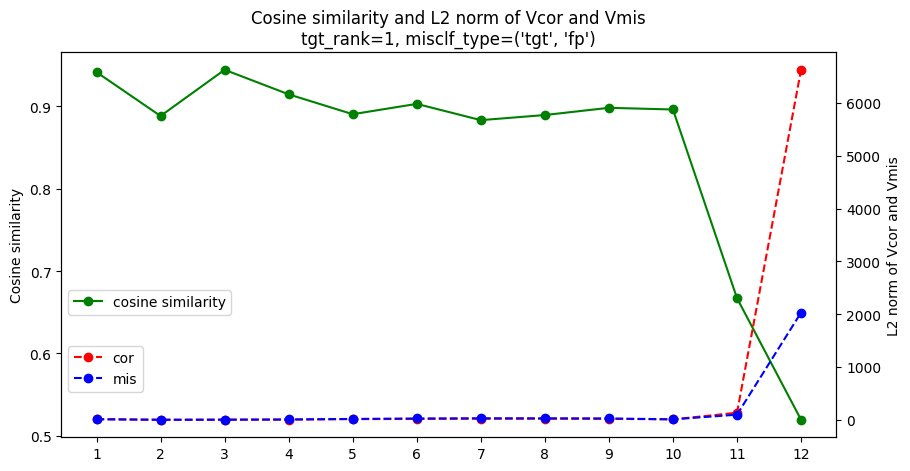

tgt_rank=1, misclf_type=tgt, fpfn=fn
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


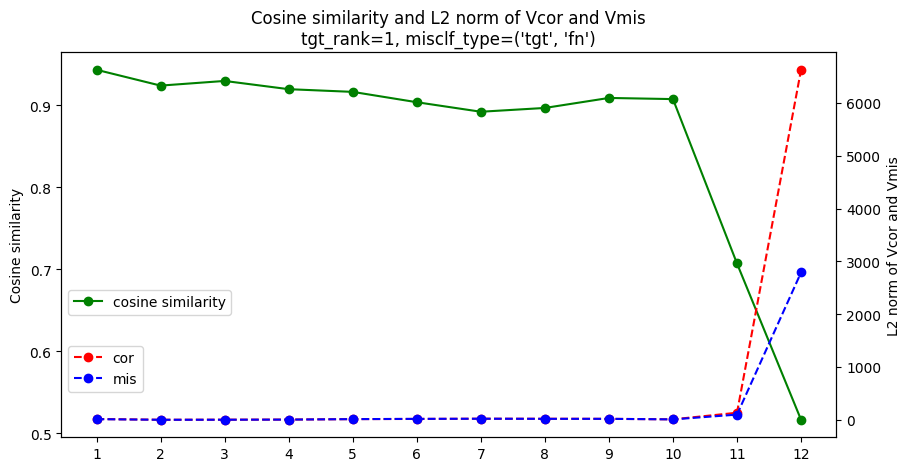

tgt_rank=2, misclf_type=src_tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


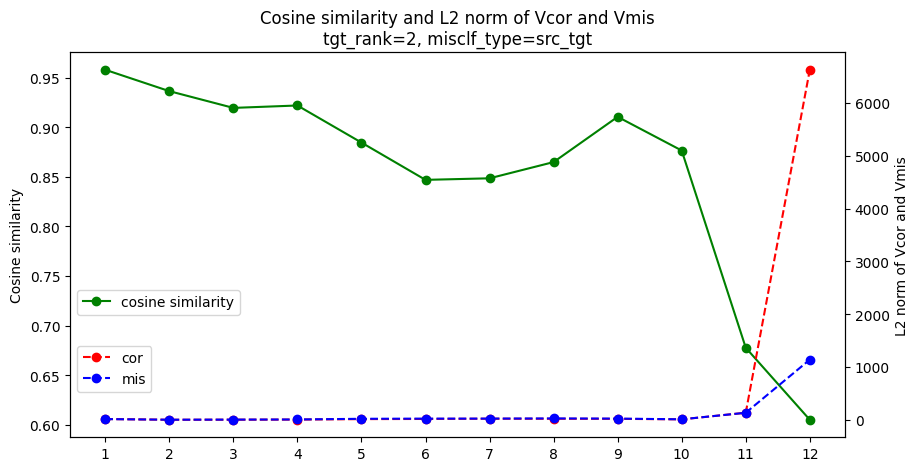

tgt_rank=2, misclf_type=tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


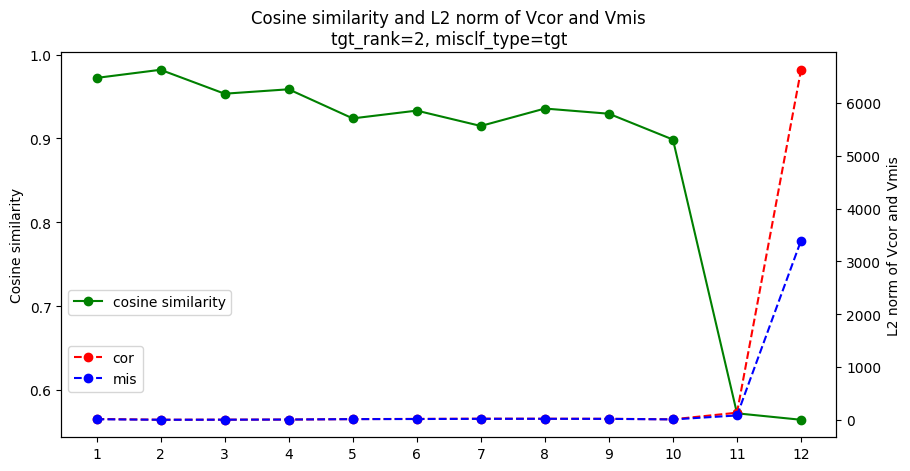

tgt_rank=2, misclf_type=tgt, fpfn=fp
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


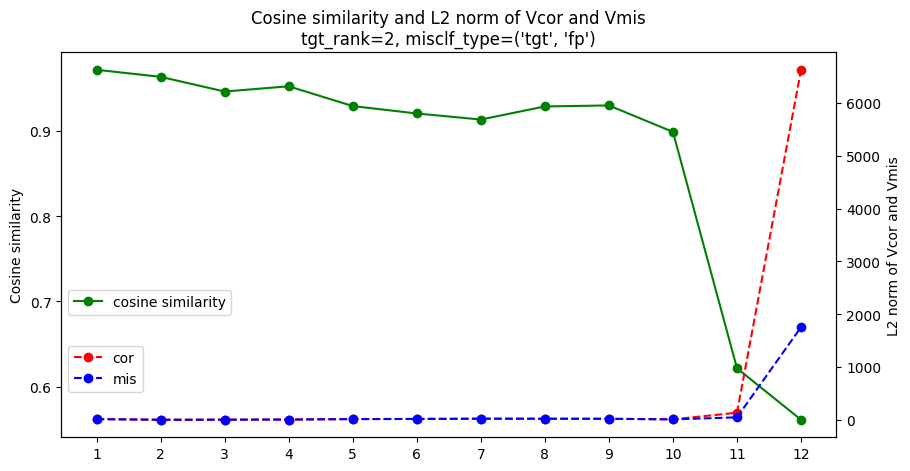

tgt_rank=2, misclf_type=tgt, fpfn=fn
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


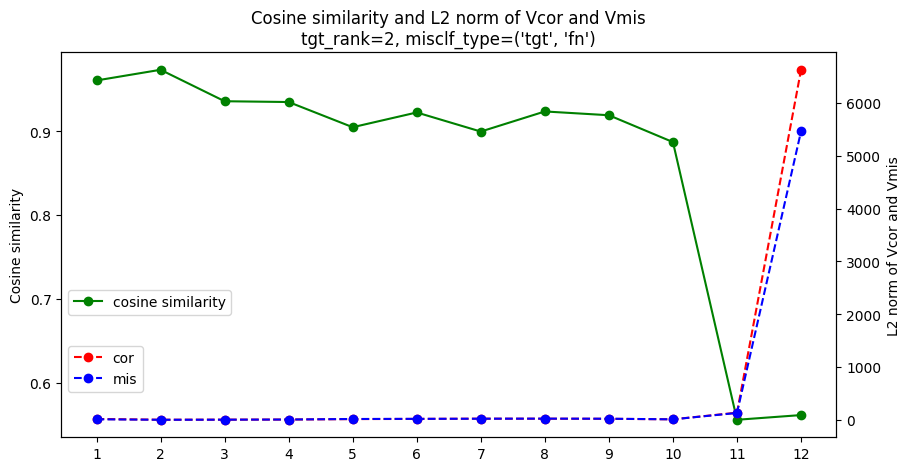

tgt_rank=3, misclf_type=src_tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


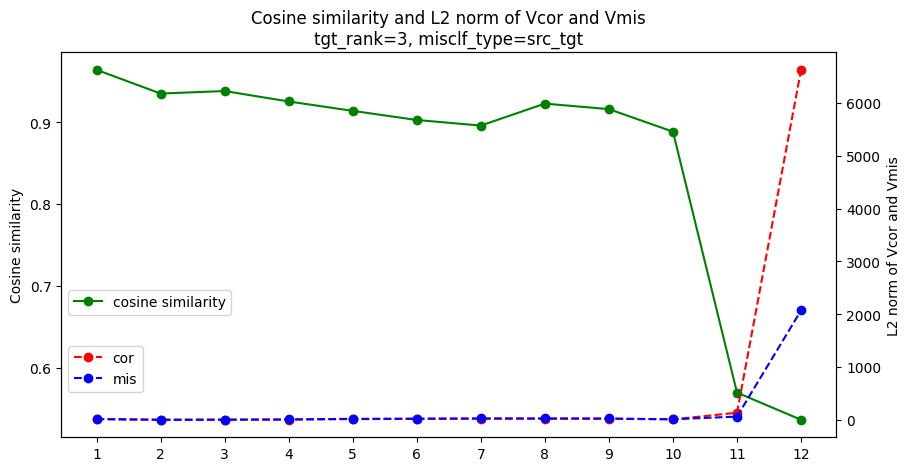

tgt_rank=3, misclf_type=tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


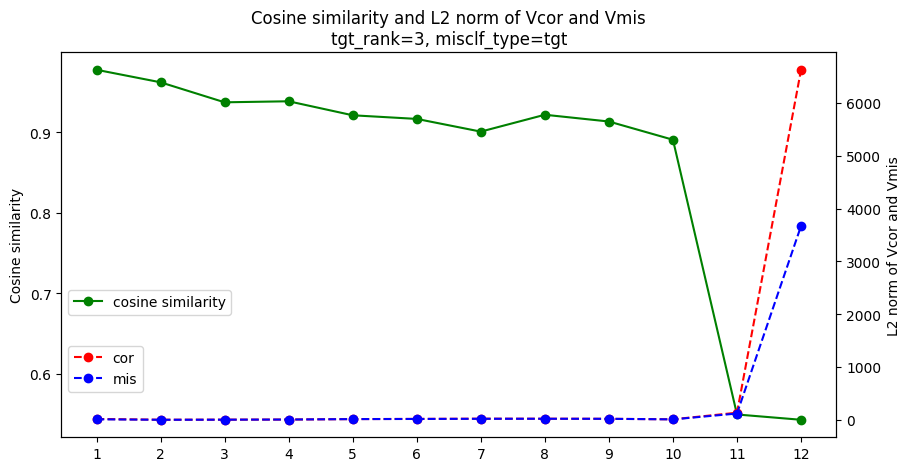

tgt_rank=3, misclf_type=tgt, fpfn=fp
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


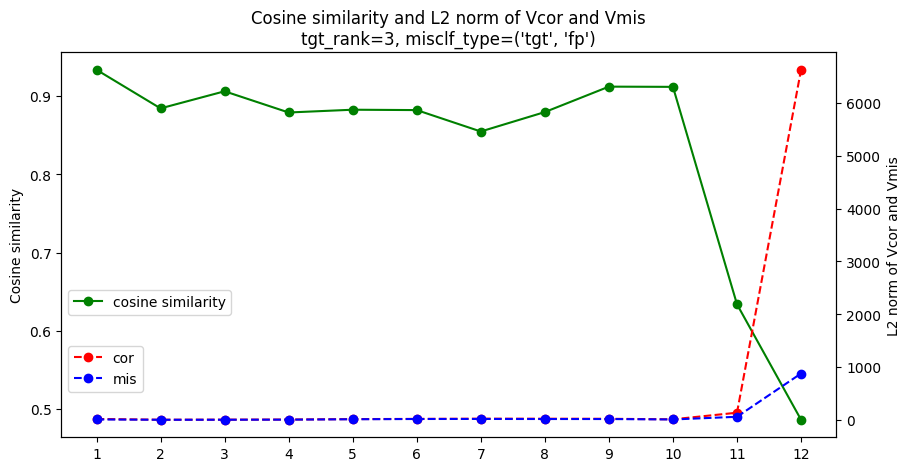

tgt_rank=3, misclf_type=tgt, fpfn=fn
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


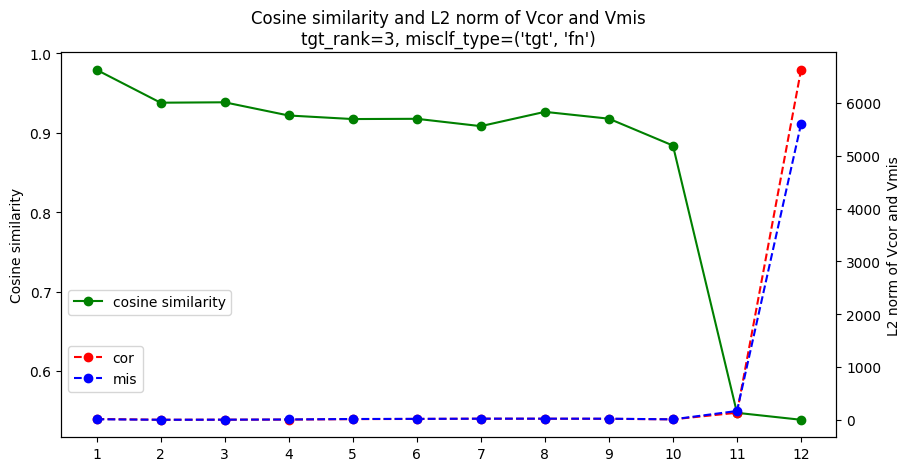

tgt_rank=4, misclf_type=src_tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


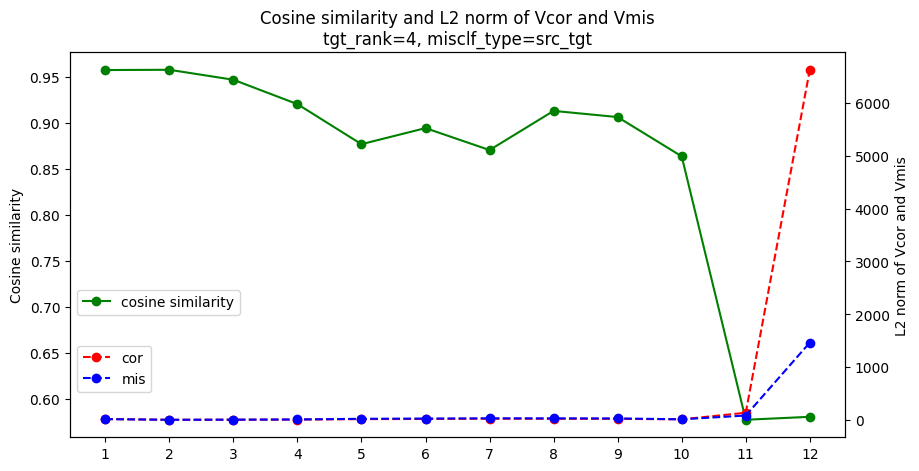

tgt_rank=4, misclf_type=tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


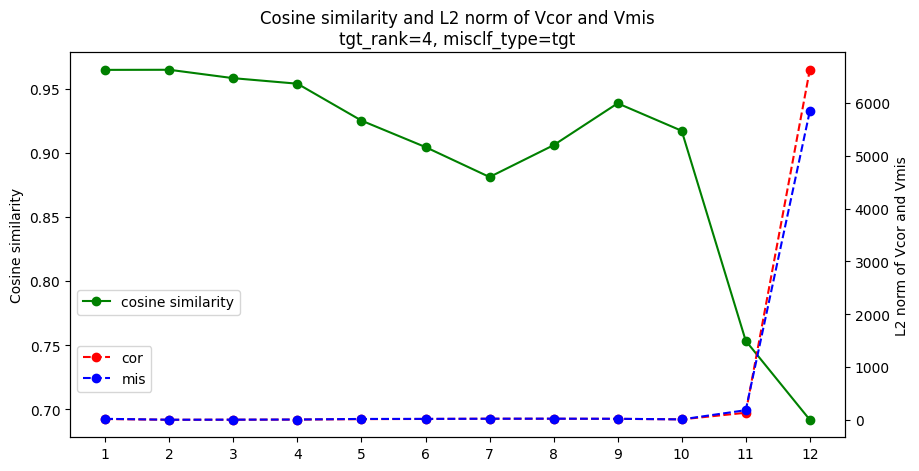

tgt_rank=4, misclf_type=tgt, fpfn=fp
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


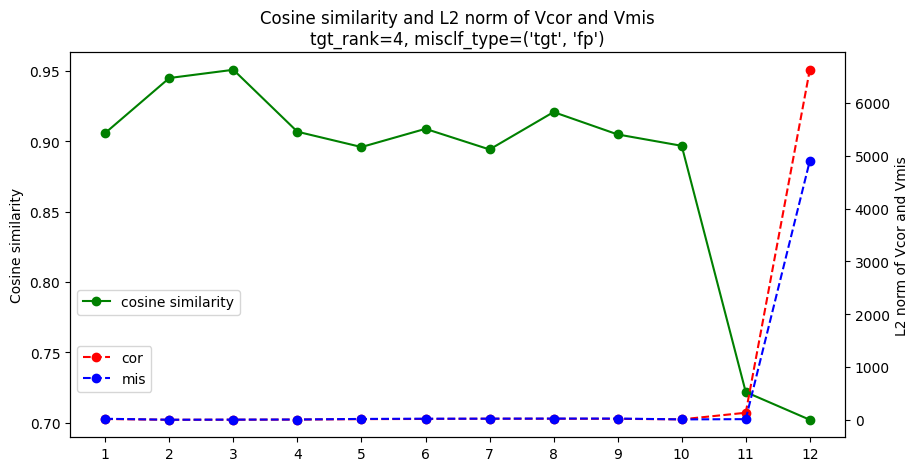

tgt_rank=4, misclf_type=tgt, fpfn=fn
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


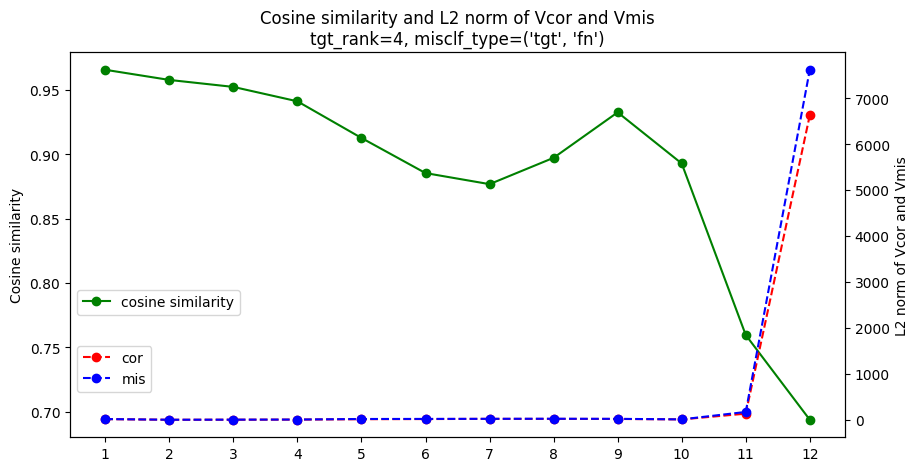

tgt_rank=5, misclf_type=src_tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


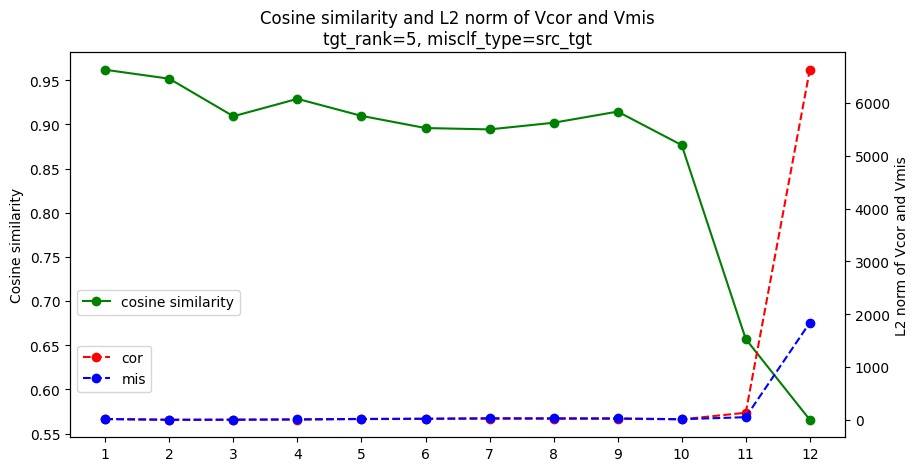

tgt_rank=5, misclf_type=tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


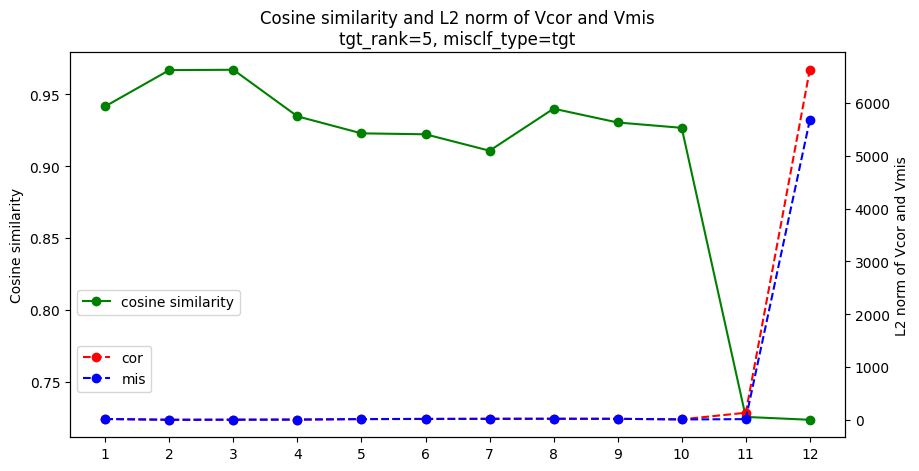

tgt_rank=5, misclf_type=tgt, fpfn=fp
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


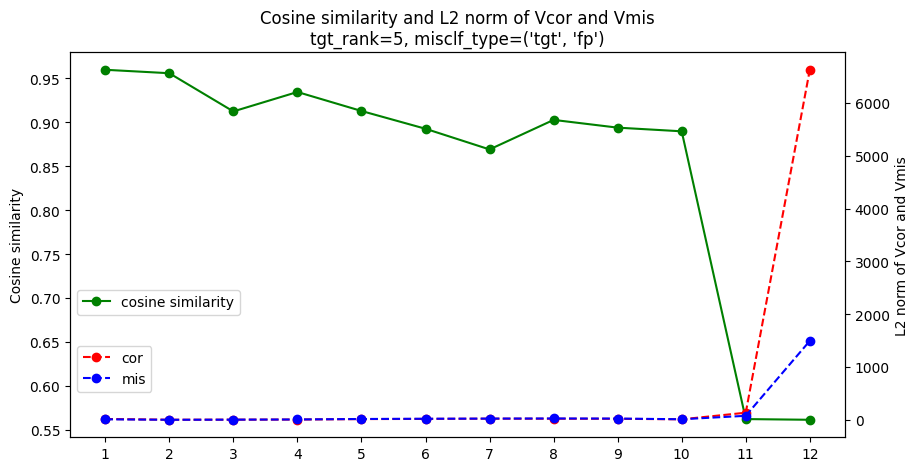

tgt_rank=5, misclf_type=tgt, fpfn=fn
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


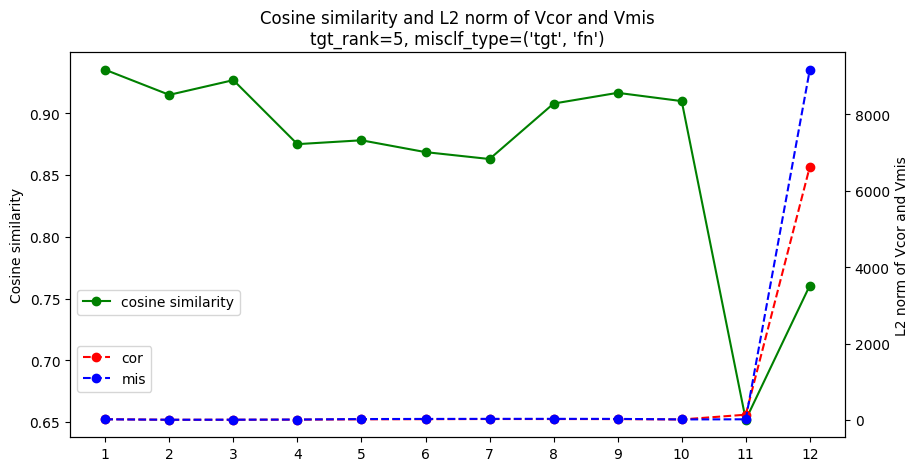

In [4]:
result_abs = load_vscores(pretrained_dir, misclf_info_dir, tgt_ranks, misclf_types, abs=True, covavg=False)
# print(result)
print(f"len(result)={len(result_abs)}")
# for k, v in result.items():
#     tgt_rank, misclf_type, sample_type = k
#     print(f"Key: {k}, Shape: {v.shape}")

for tgt_rank in tgt_ranks:
    for misclf_type_raw in misclf_types:
        if isinstance(misclf_type_raw, tuple):
            misclf_type, fpfn = misclf_type_raw
        else:
            misclf_type, fpfn = misclf_type_raw, None
        vcor = result_abs[(tgt_rank, misclf_type_raw, "cor")]
        vmis = result_abs[(tgt_rank, misclf_type_raw, "mis")]
        print(f"tgt_rank={tgt_rank}, misclf_type={misclf_type}, fpfn={fpfn}")
        print(f"vpos.shape={vcor.shape}, vmis.shape={vmis.shape}")
        
        dot_products = np.sum(vcor * vmis, axis=1)
        a_norms = np.linalg.norm(vcor, axis=1)
        b_norms = np.linalg.norm(vmis, axis=1)
        cosine_similarity = dot_products / (a_norms * b_norms)
        fig, ax1 = plt.subplots(figsize=(10, 5))
        ax1.plot(cosine_similarity, color="g", marker="o", label="cosine similarity")
        ax1.set_ylabel('Cosine similarity')
        ax1.tick_params(axis='y')
        ax2 = ax1.twinx()
        ax2.plot(a_norms, color="r", marker="o", linestyle="--", label="cor")
        ax2.plot(b_norms, color="b", marker="o", linestyle="--", label="mis")
        ax2.set_xlabel("Layer")
        ax2.set_ylabel("L2 norm of Vcor and Vmis")
        # グラフに凡例を追加
        ax1.legend(loc='lower left', bbox_to_anchor=(0, 0.3))
        ax2.legend(loc='lower left', bbox_to_anchor=(0, 0.1))
        plt.xticks(np.arange(0, 12, 1), np.arange(1, 13, 1))
        plt.title(f"Cosine similarity and L2 norm of Vcor and Vmis\n"
                  f"tgt_rank={tgt_rank}, misclf_type={misclf_type_raw}")
        plt.show()

len(result)=40
tgt_rank=1, misclf_type=src_tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


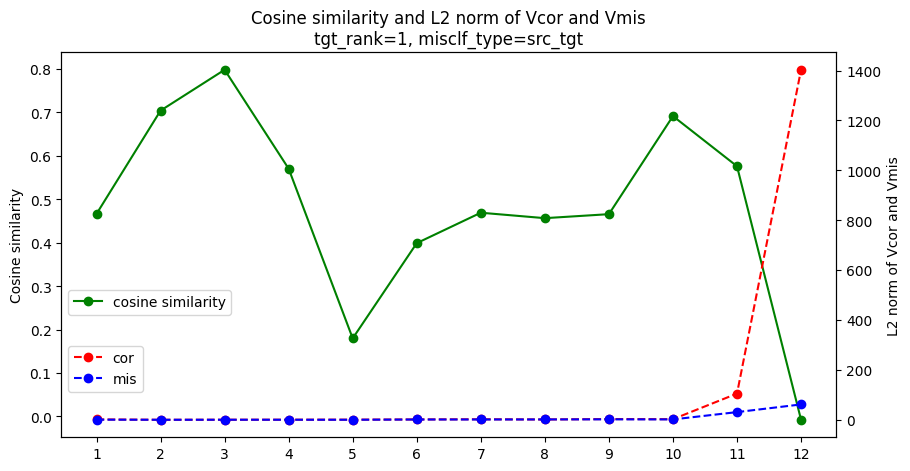

tgt_rank=1, misclf_type=tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


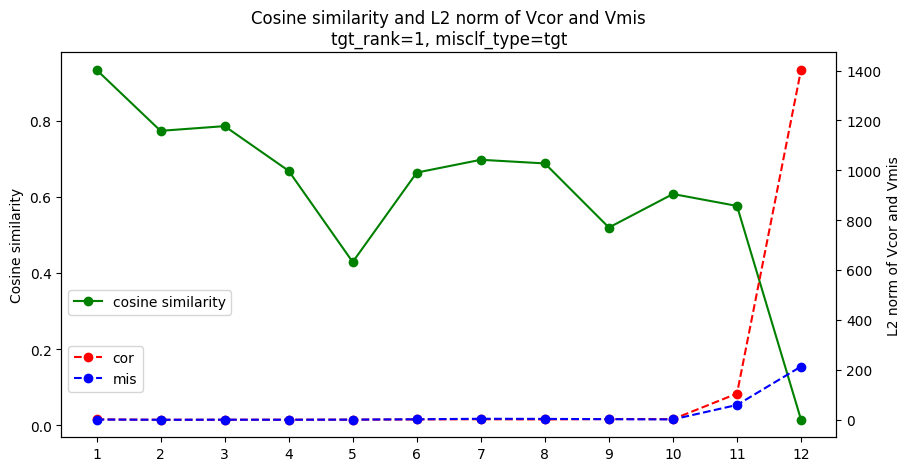

tgt_rank=1, misclf_type=tgt, fpfn=fp
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


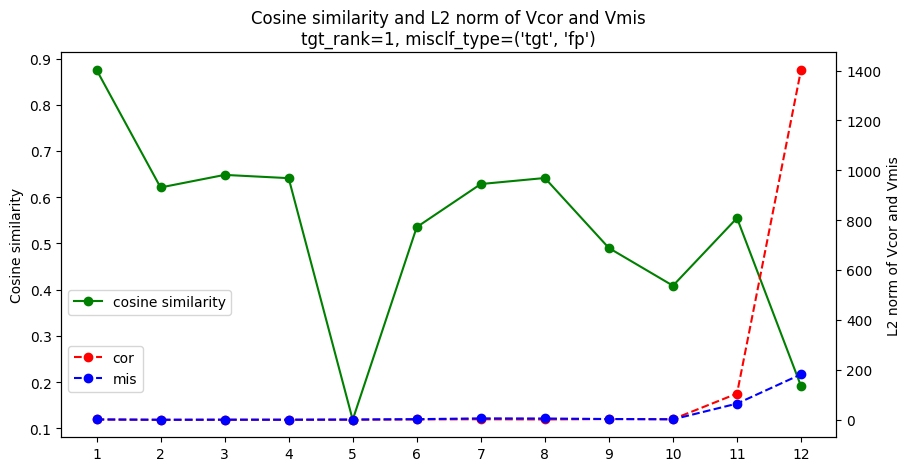

tgt_rank=1, misclf_type=tgt, fpfn=fn
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


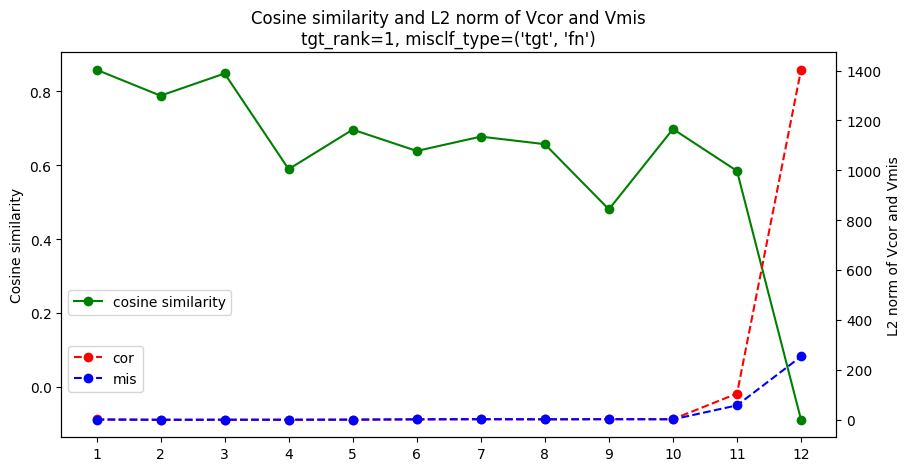

tgt_rank=2, misclf_type=src_tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


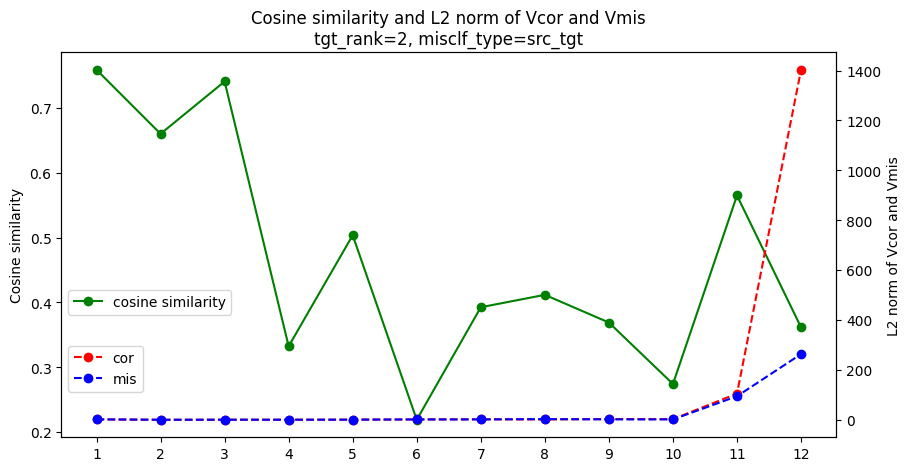

tgt_rank=2, misclf_type=tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


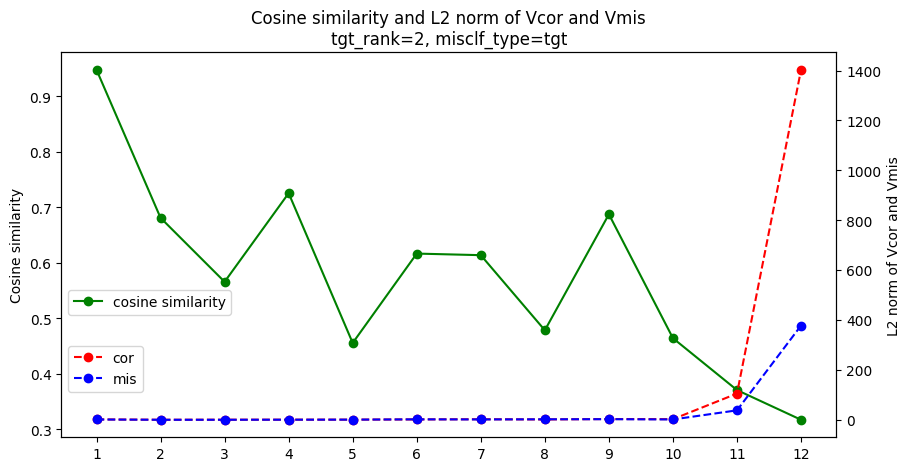

tgt_rank=2, misclf_type=tgt, fpfn=fp
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


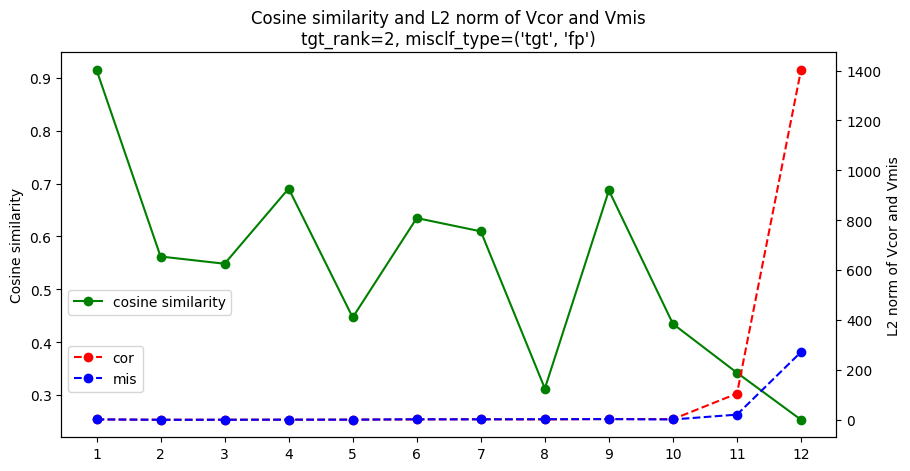

tgt_rank=2, misclf_type=tgt, fpfn=fn
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


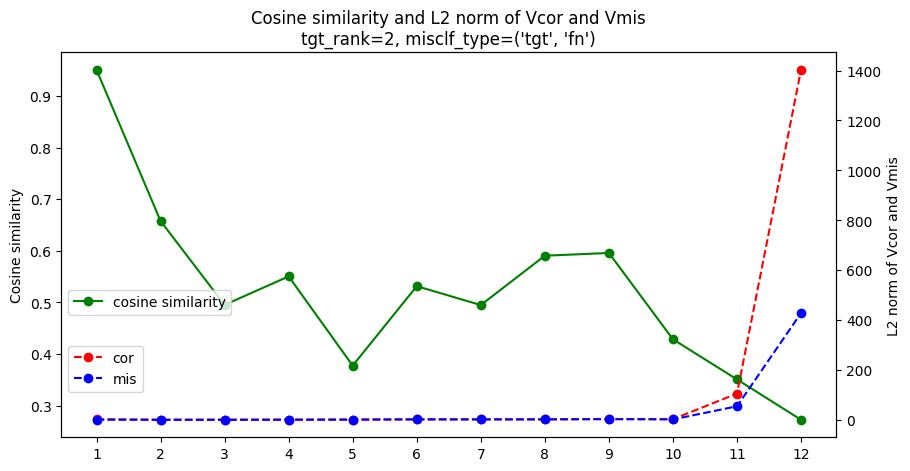

tgt_rank=3, misclf_type=src_tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


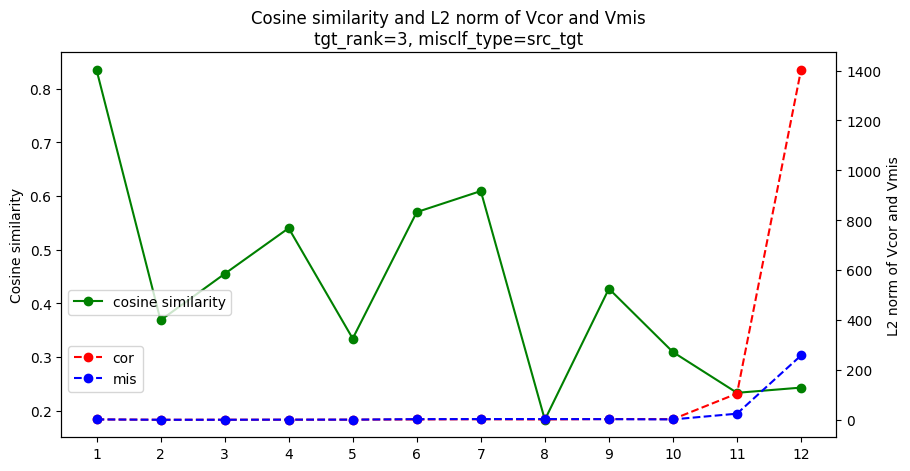

tgt_rank=3, misclf_type=tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


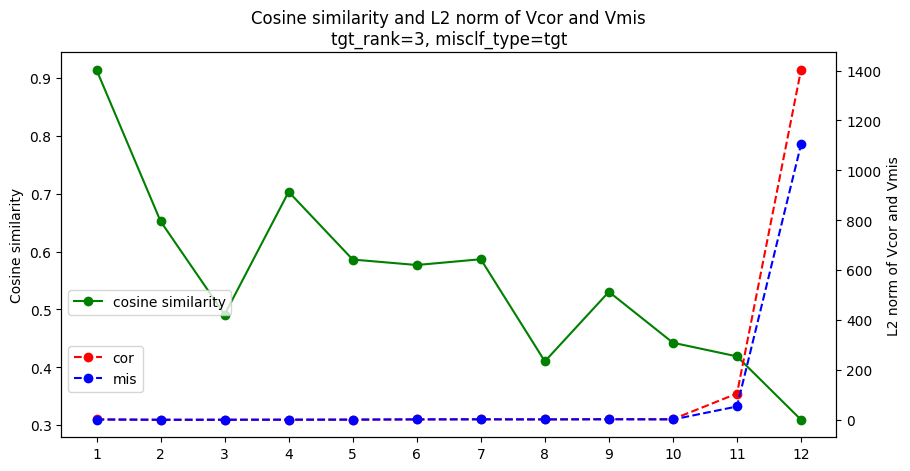

tgt_rank=3, misclf_type=tgt, fpfn=fp
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


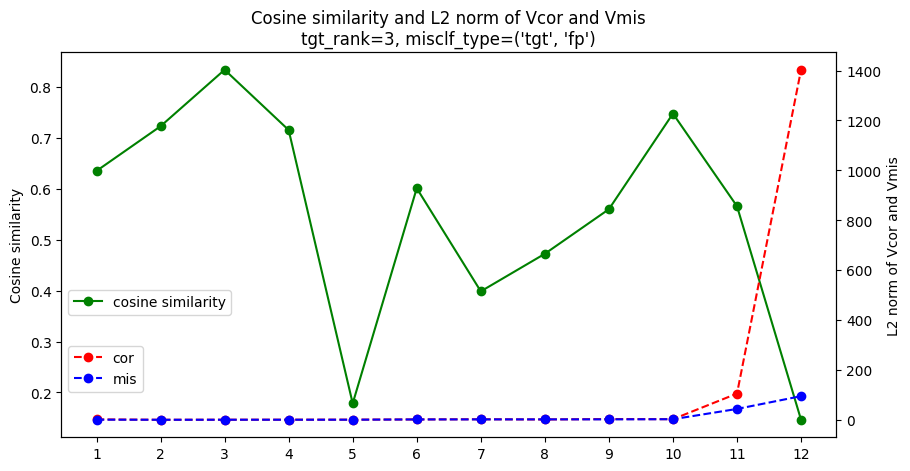

tgt_rank=3, misclf_type=tgt, fpfn=fn
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


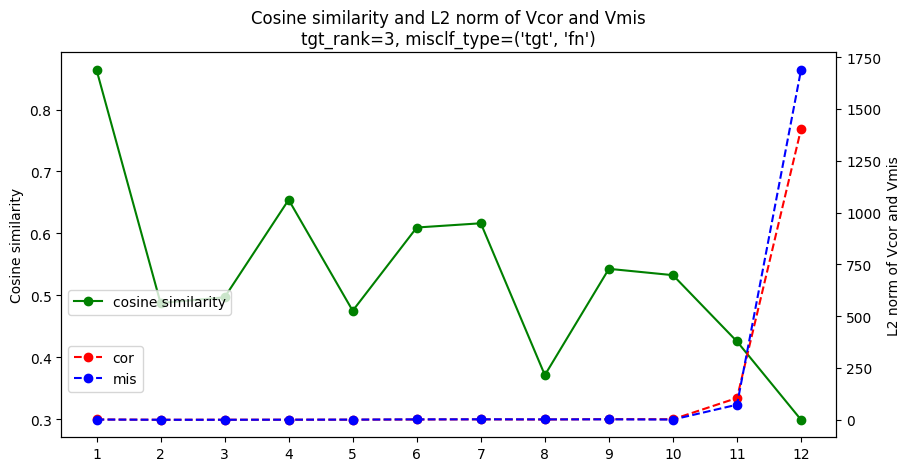

tgt_rank=4, misclf_type=src_tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


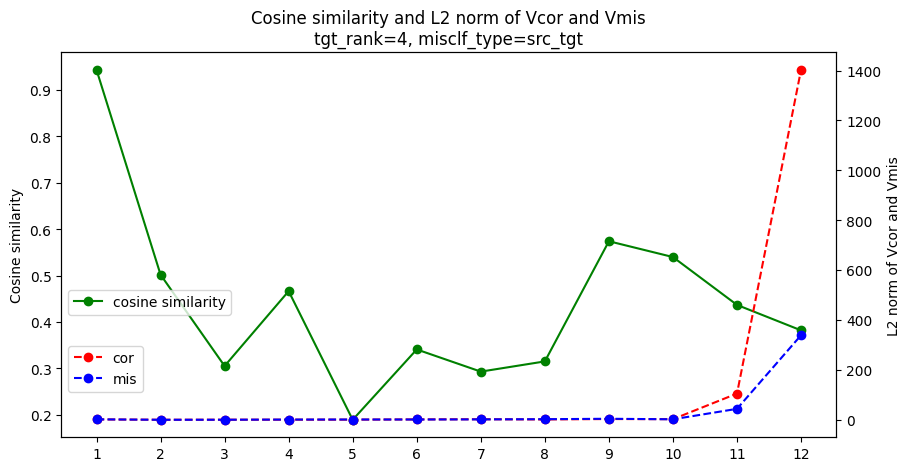

tgt_rank=4, misclf_type=tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


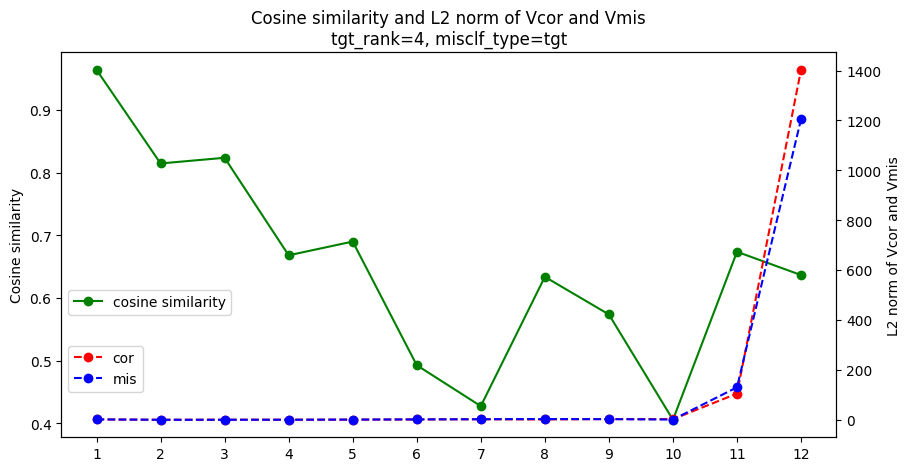

tgt_rank=4, misclf_type=tgt, fpfn=fp
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


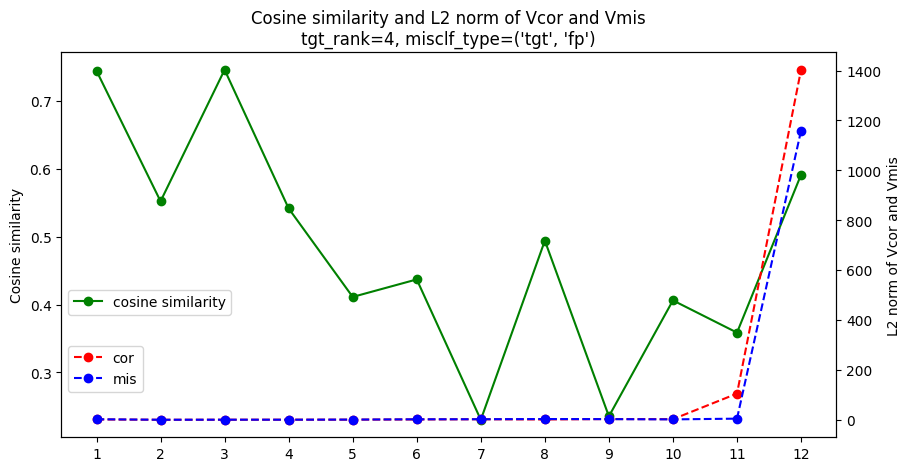

tgt_rank=4, misclf_type=tgt, fpfn=fn
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


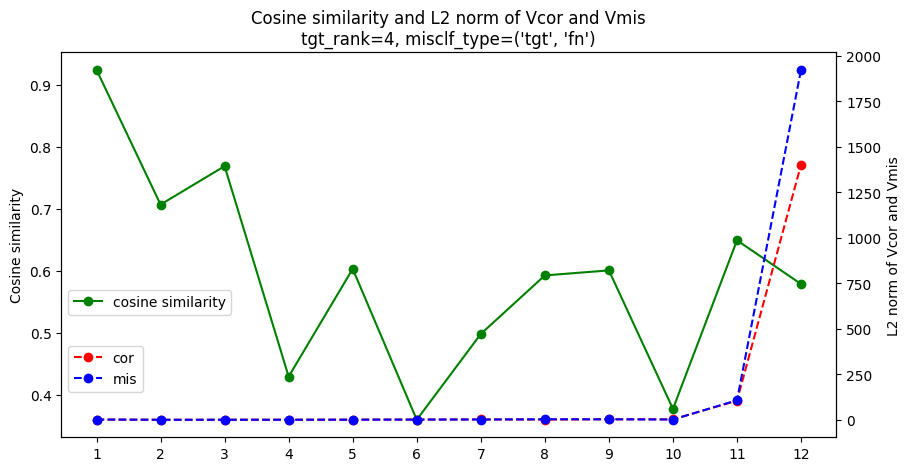

tgt_rank=5, misclf_type=src_tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


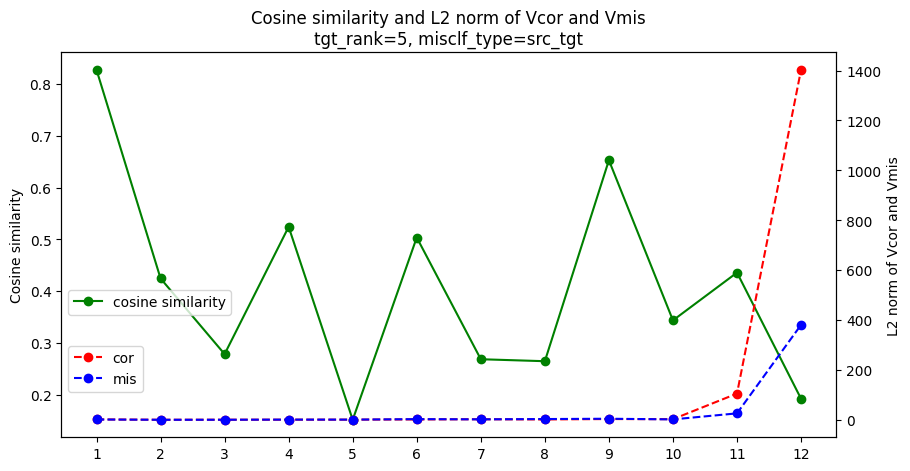

tgt_rank=5, misclf_type=tgt, fpfn=None
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


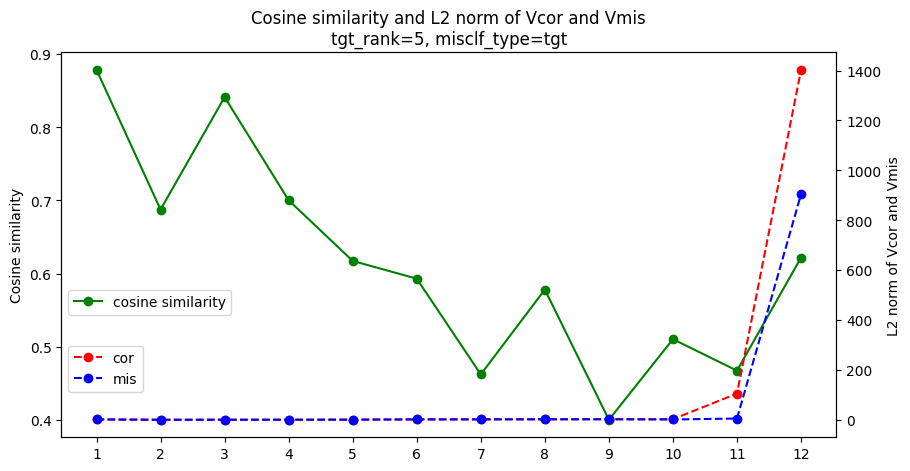

tgt_rank=5, misclf_type=tgt, fpfn=fp
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


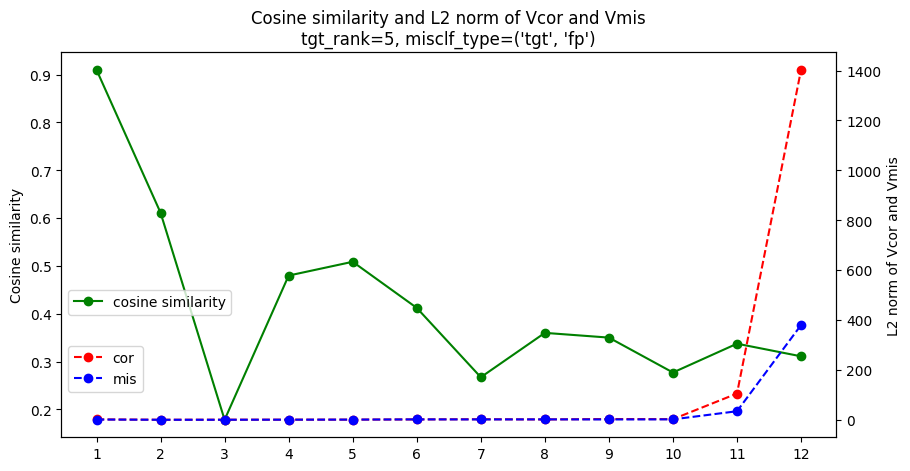

tgt_rank=5, misclf_type=tgt, fpfn=fn
vpos.shape=(12, 3072), vmis.shape=(12, 3072)


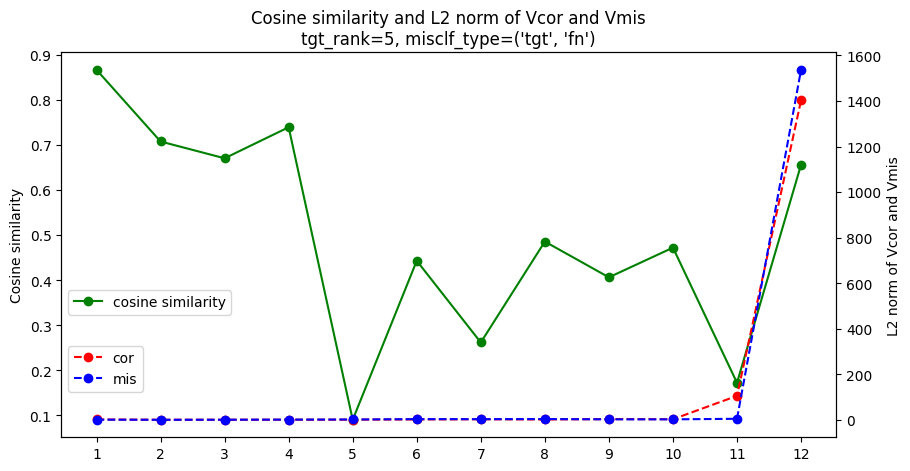

In [5]:
result = load_vscores(pretrained_dir, misclf_info_dir, tgt_ranks, misclf_types, abs=False, covavg=False)
# print(result)
print(f"len(result)={len(result)}")
# for k, v in result.items():
#     tgt_rank, misclf_type, sample_type = k
#     print(f"Key: {k}, Shape: {v.shape}")

for tgt_rank in tgt_ranks:
    for misclf_type_raw in misclf_types:
        if isinstance(misclf_type_raw, tuple):
            misclf_type, fpfn = misclf_type_raw
        else:
            misclf_type, fpfn = misclf_type_raw, None
        vcor = result[(tgt_rank, misclf_type_raw, "cor")]
        vmis = result[(tgt_rank, misclf_type_raw, "mis")]
        print(f"tgt_rank={tgt_rank}, misclf_type={misclf_type}, fpfn={fpfn}")
        print(f"vpos.shape={vcor.shape}, vmis.shape={vmis.shape}")
        
        dot_products = np.sum(vcor * vmis, axis=1)
        a_norms = np.linalg.norm(vcor, axis=1)
        b_norms = np.linalg.norm(vmis, axis=1)
        cosine_similarity = dot_products / (a_norms * b_norms)
        fig, ax1 = plt.subplots(figsize=(10, 5))
        ax1.plot(cosine_similarity, color="g", marker="o", label="cosine similarity")
        ax1.set_ylabel('Cosine similarity')
        ax1.tick_params(axis='y')
        ax2 = ax1.twinx()
        ax2.plot(a_norms, color="r", marker="o", linestyle="--", label="cor")
        ax2.plot(b_norms, color="b", marker="o", linestyle="--", label="mis")
        ax2.set_xlabel("Layer")
        ax2.set_ylabel("L2 norm of Vcor and Vmis")
        # グラフに凡例を追加
        ax1.legend(loc='lower left', bbox_to_anchor=(0, 0.3))
        ax2.legend(loc='lower left', bbox_to_anchor=(0, 0.1))
        plt.xticks(np.arange(0, 12, 1), np.arange(1, 13, 1))
        plt.title(f"Cosine similarity and L2 norm of Vcor and Vmis\n"
                  f"tgt_rank={tgt_rank}, misclf_type={misclf_type_raw}")
        plt.show()

vdiff_layer min=-5.76450759505432, max=27.94829941128479
vdiff_abs_layer min=-5.673067650914662, max=22.53036019070624


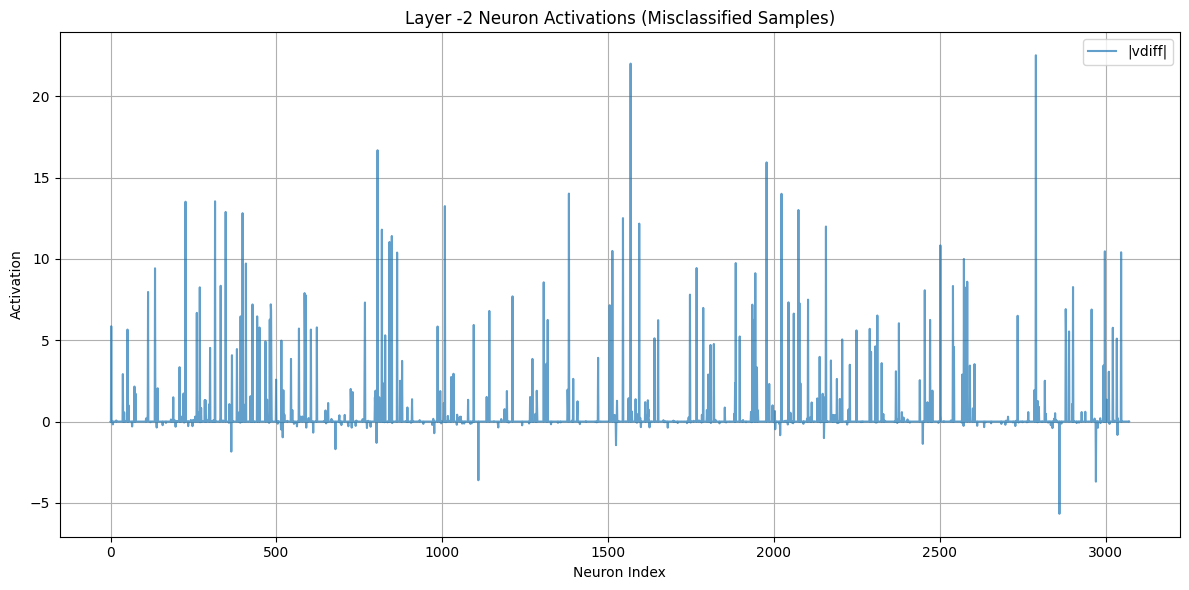

vdiff_layer min=-14.927383741006107, max=23.02354142690402
vdiff_abs_layer min=-10.464099349220888, max=22.4293539839586


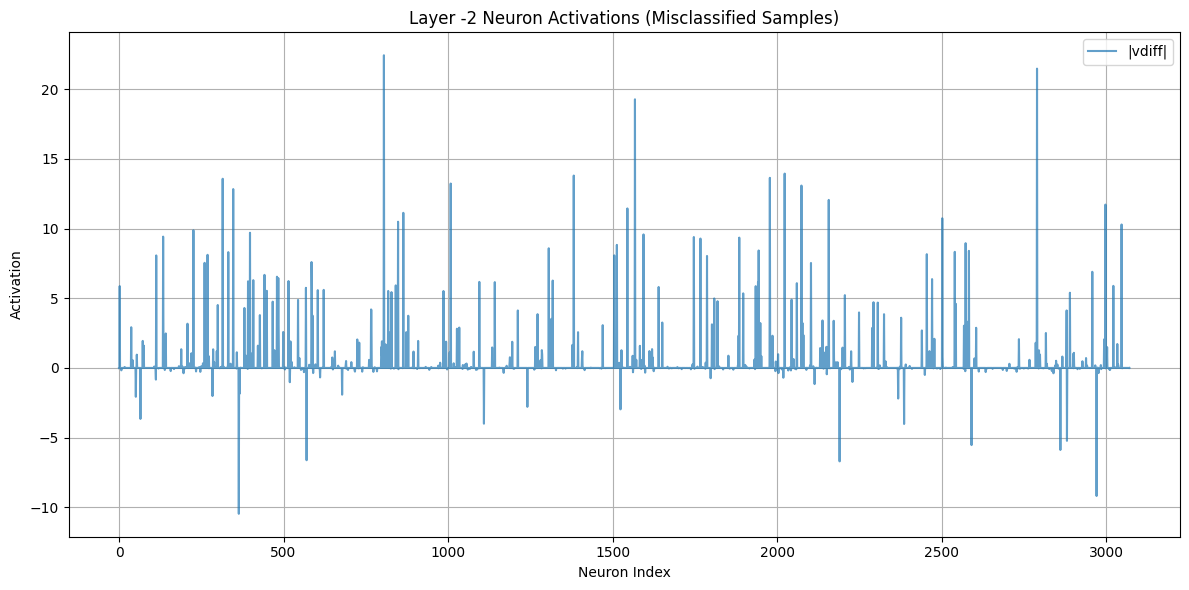

vdiff_layer min=-20.58255505773818, max=23.291531356296346
vdiff_abs_layer min=-11.199555254125231, max=22.21448909434446


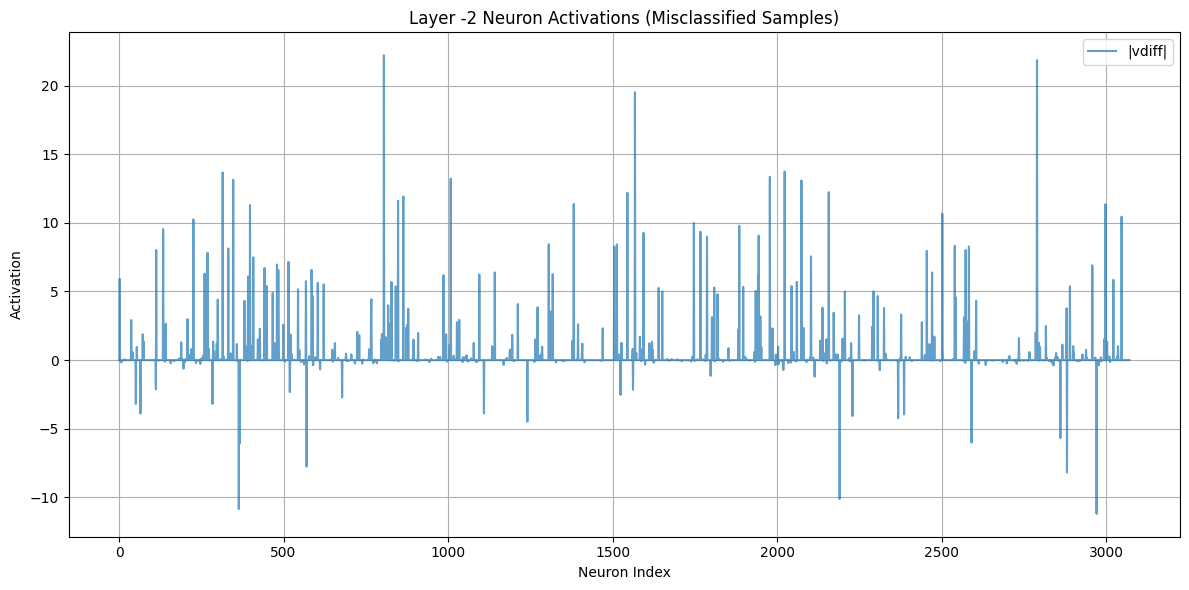

vdiff_layer min=-15.745549863264547, max=23.427785223216198
vdiff_abs_layer min=-10.41019677651816, max=22.895957290826182


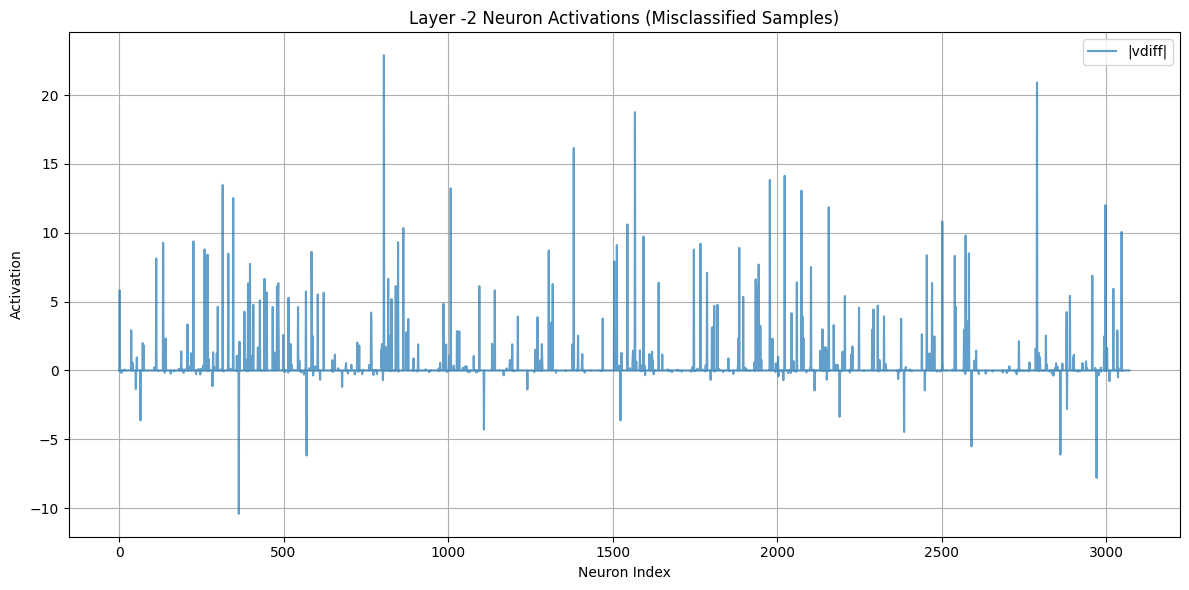

vdiff_layer min=-33.707664690877714, max=25.688665772666308
vdiff_abs_layer min=-26.471364246804452, max=24.302822246223045


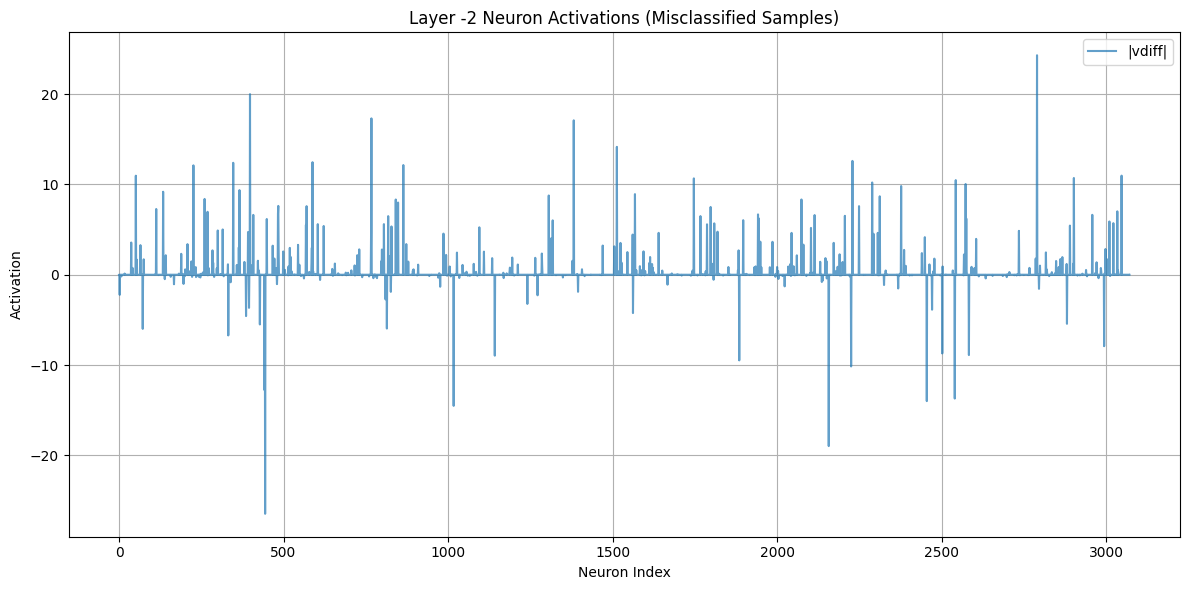

vdiff_layer min=-19.67611497325491, max=26.665345955976765
vdiff_abs_layer min=-11.443352573858128, max=24.95708786908784


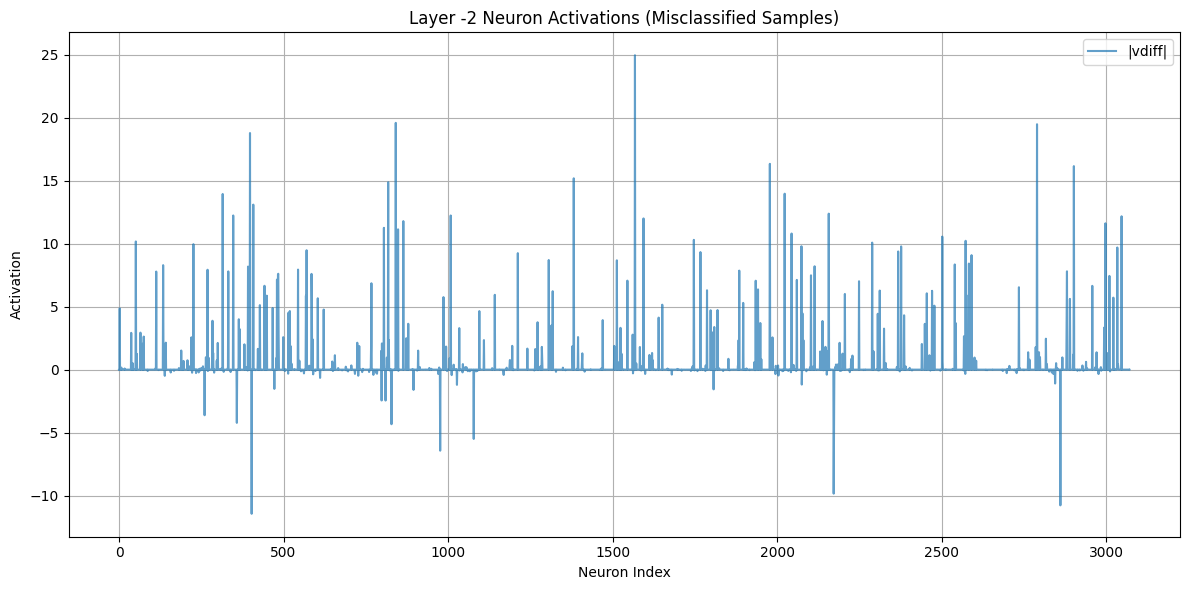

vdiff_layer min=-9.426644926218644, max=26.831874197057736
vdiff_abs_layer min=-8.984904995260111, max=25.344668918373184


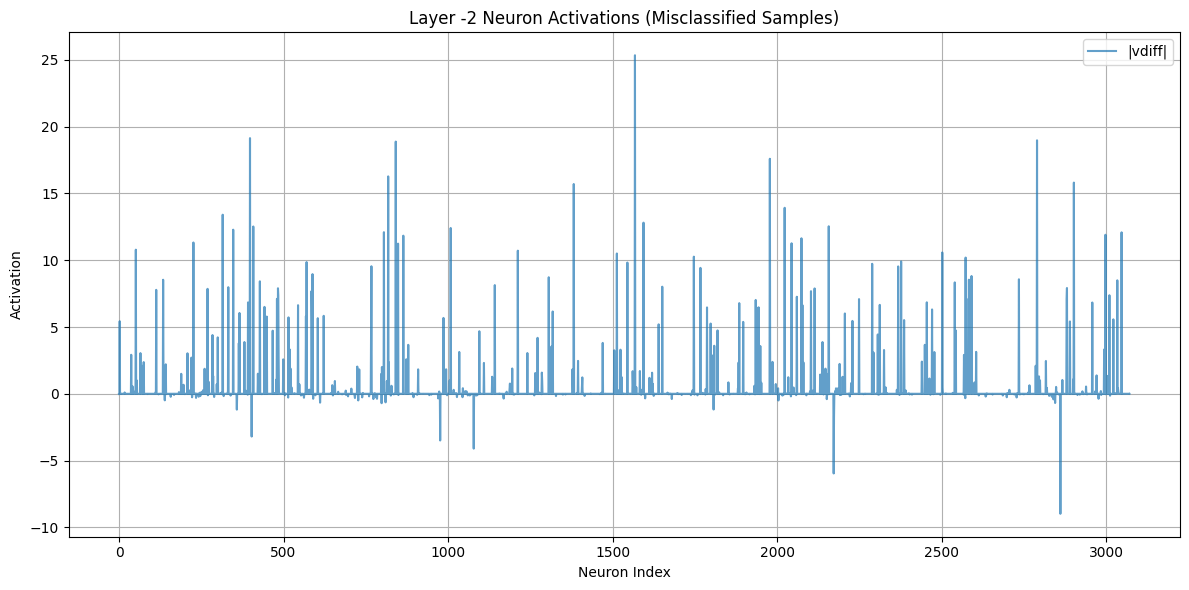

vdiff_layer min=-34.241029188823994, max=26.142562752955396
vdiff_abs_layer min=-16.59634735159548, max=24.691149834152906


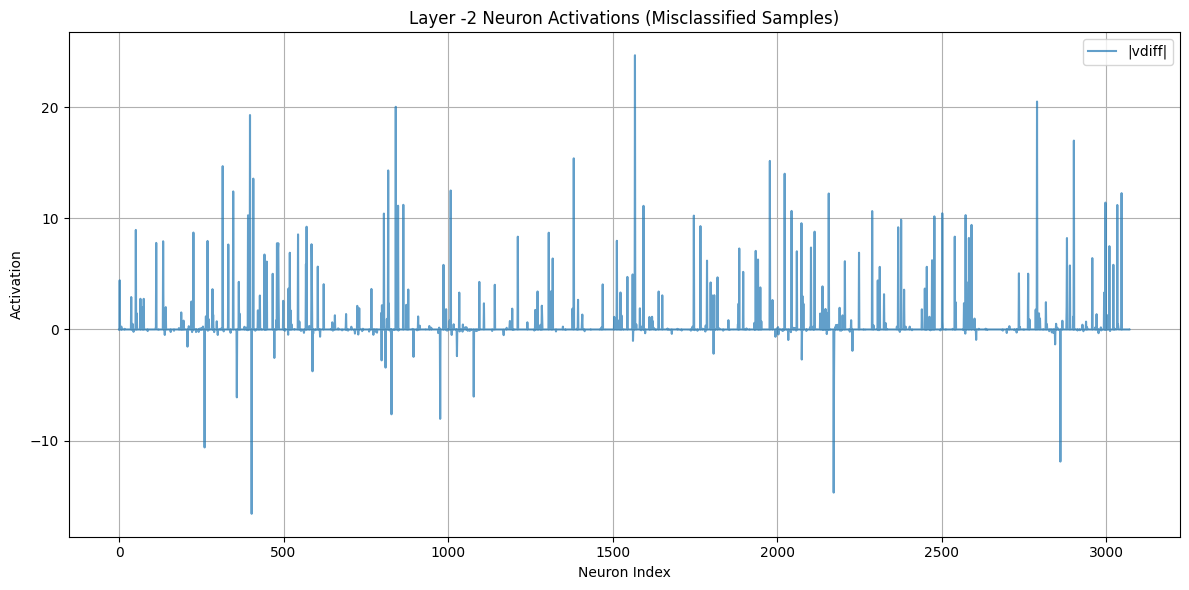

vdiff_layer min=-16.96266783210705, max=26.72932492347415
vdiff_abs_layer min=-11.292878780039402, max=25.293334421911542


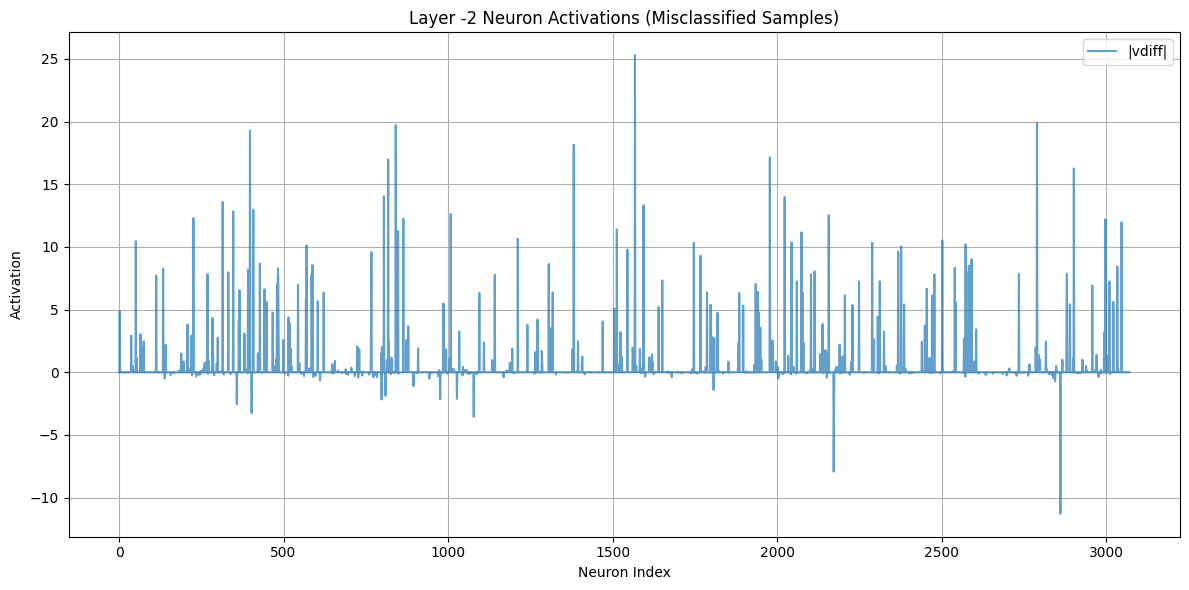

vdiff_layer min=-47.281758545143546, max=21.437713952652363
vdiff_abs_layer min=-16.004568974281504, max=18.93351703004624


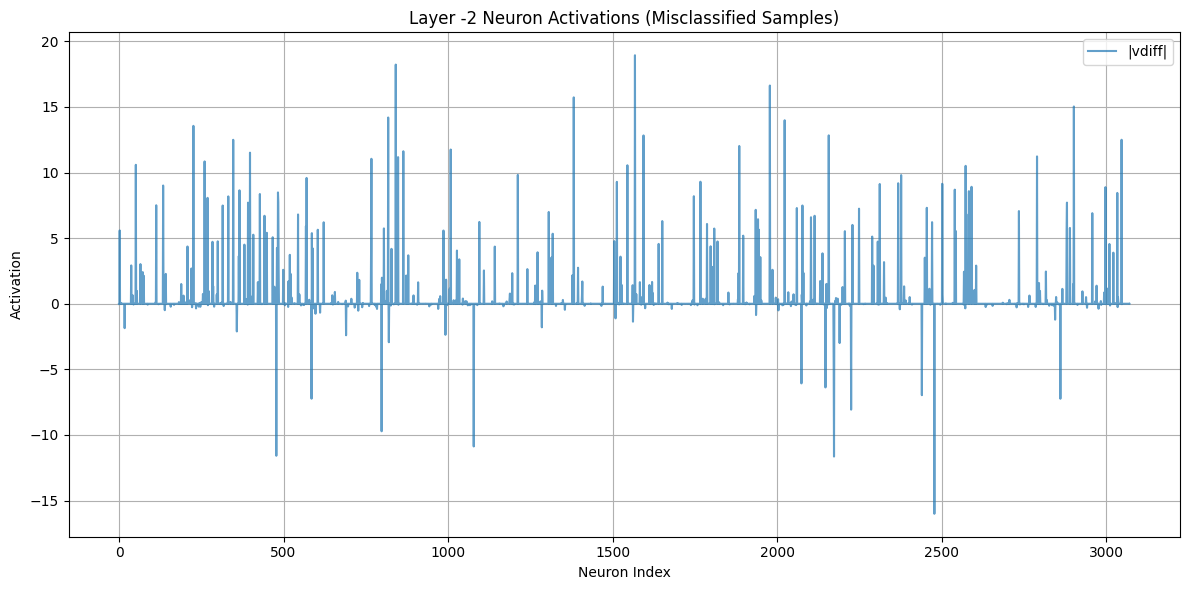

vdiff_layer min=-6.875561139794688, max=28.1122555899044
vdiff_abs_layer min=-5.770714530526197, max=22.580414677589648


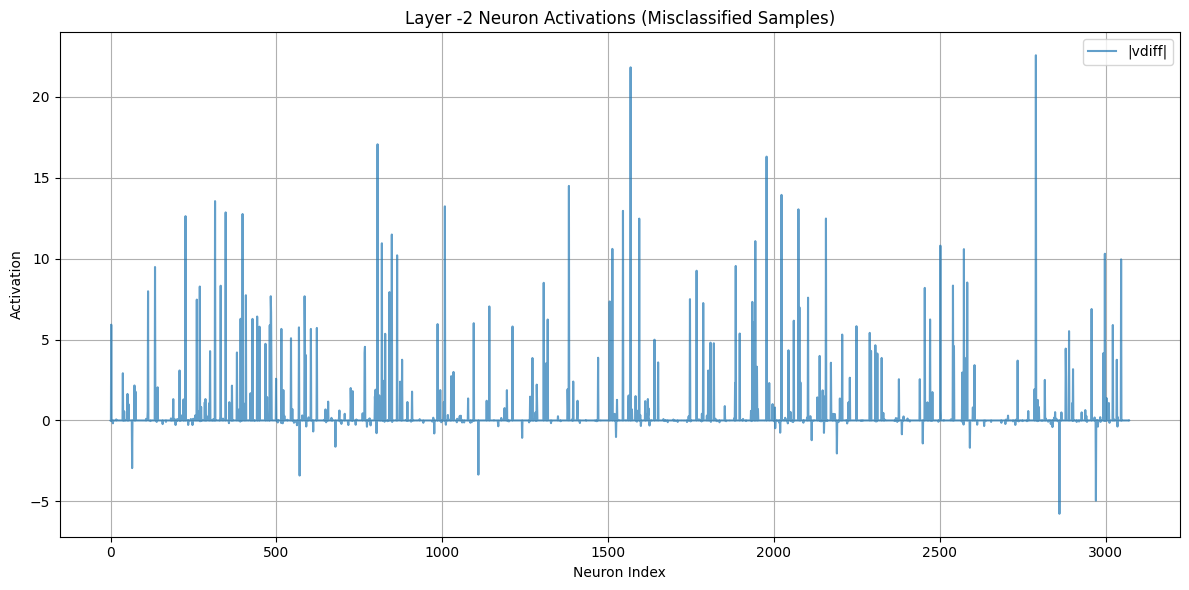

vdiff_layer min=-73.29239494027283, max=20.57290910414821
vdiff_abs_layer min=-22.893430958151633, max=17.576860417122518


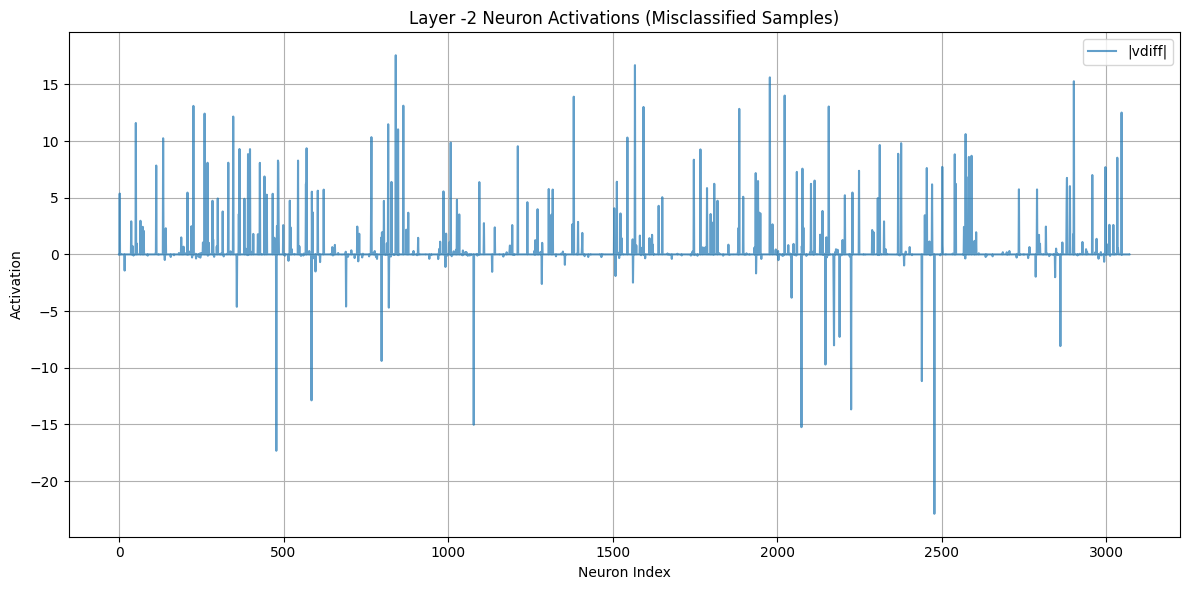

vdiff_layer min=-26.586662298310774, max=26.2685385650053
vdiff_abs_layer min=-17.312389258402067, max=24.447992047800355


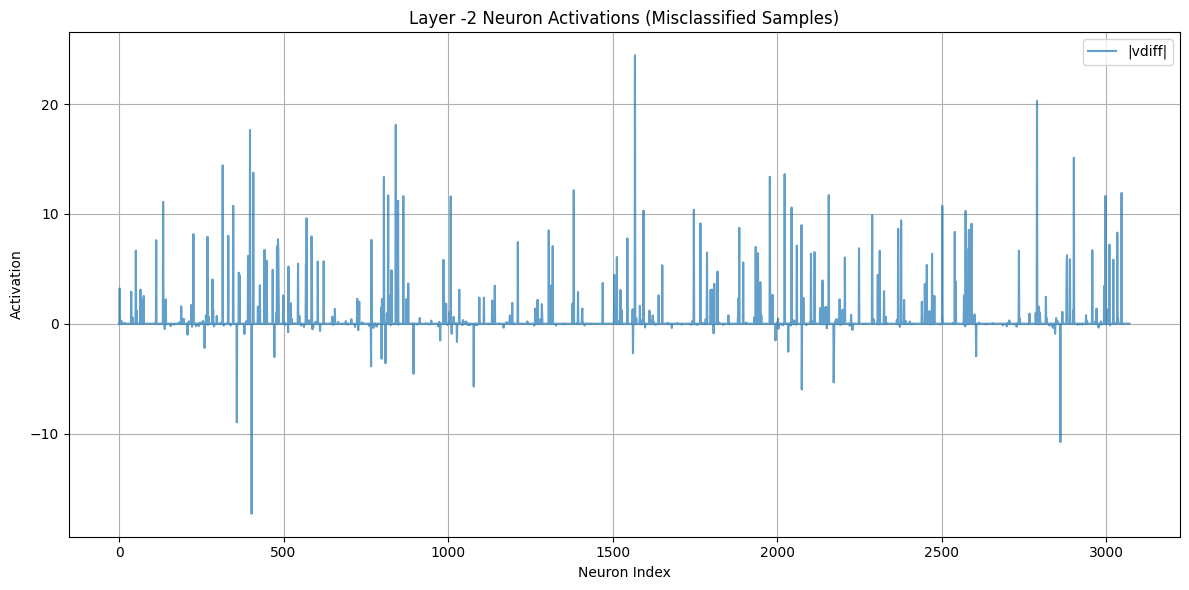

vdiff_layer min=-35.1211351509198, max=19.214032326856607
vdiff_abs_layer min=-28.555332246182534, max=20.123355539025138


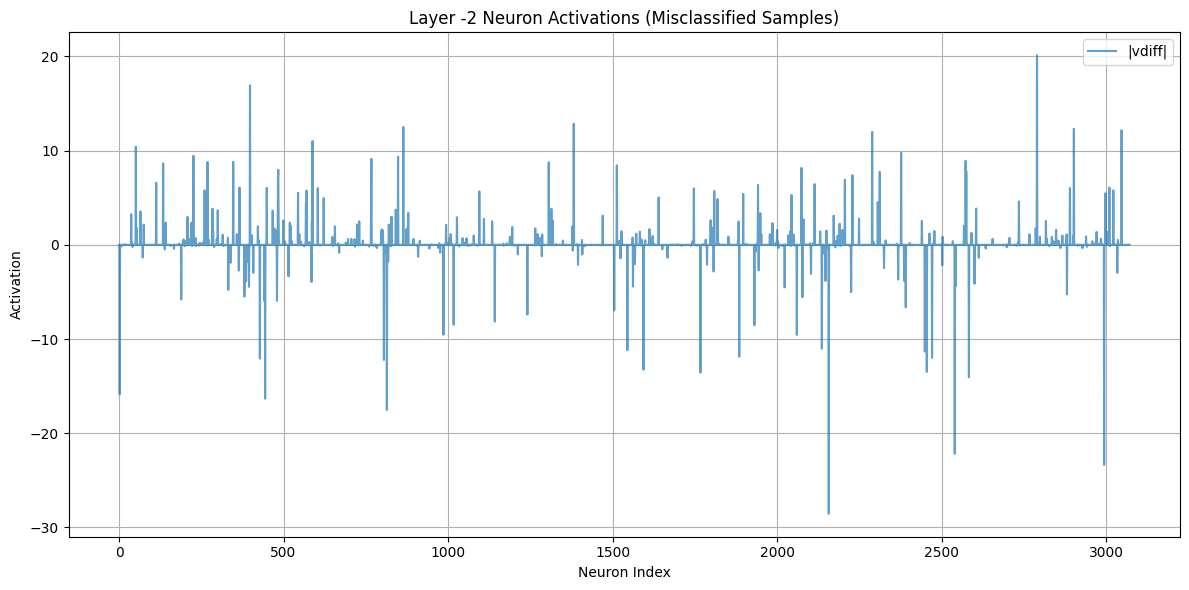

vdiff_layer min=-0.10198700606723818, max=27.667896606839893
vdiff_abs_layer min=-6.888541742877393, max=25.155267726636986


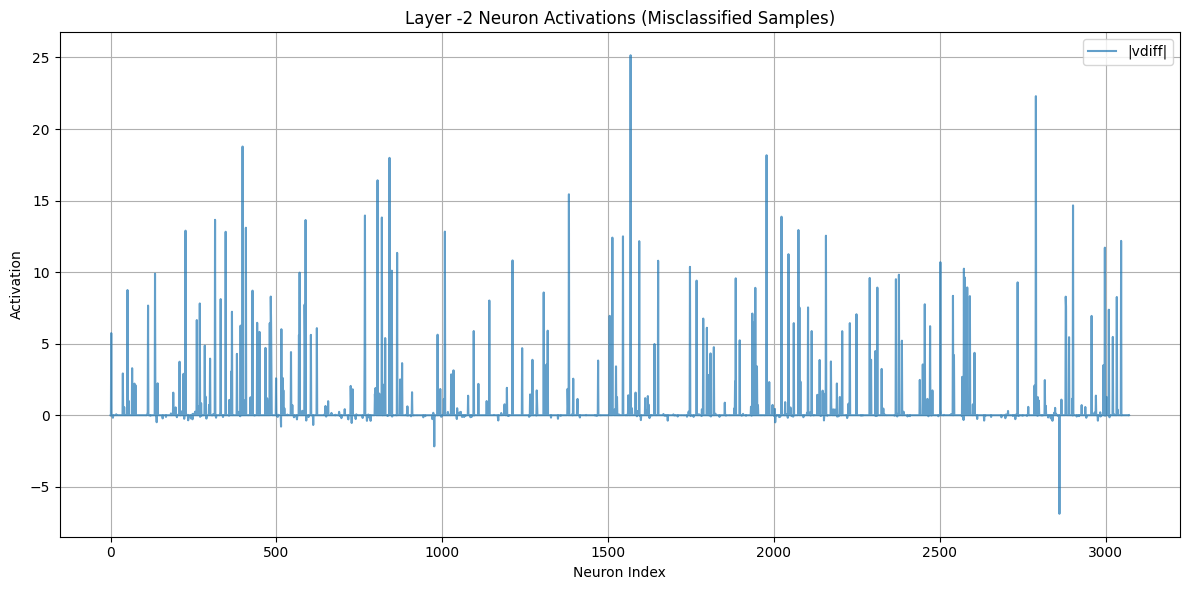

vdiff_layer min=-41.577018302575595, max=18.777226476581546
vdiff_abs_layer min=-25.464377959978297, max=26.679619772912385


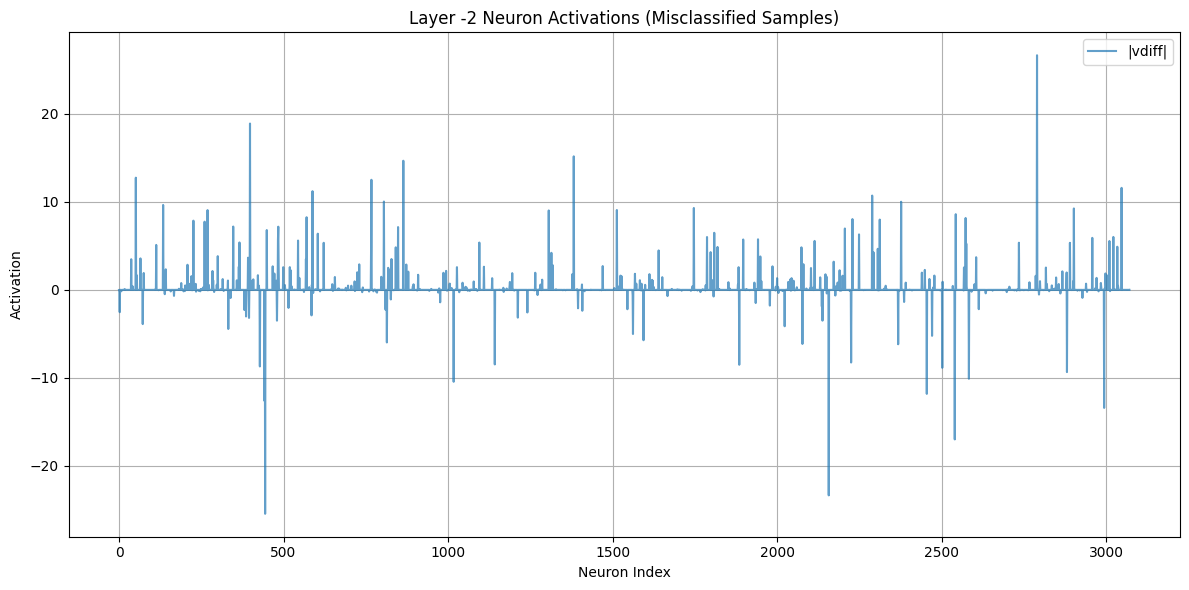

vdiff_layer min=-7.500141084524337, max=26.64986110030593
vdiff_abs_layer min=-7.1723775110170855, max=25.515178153849913


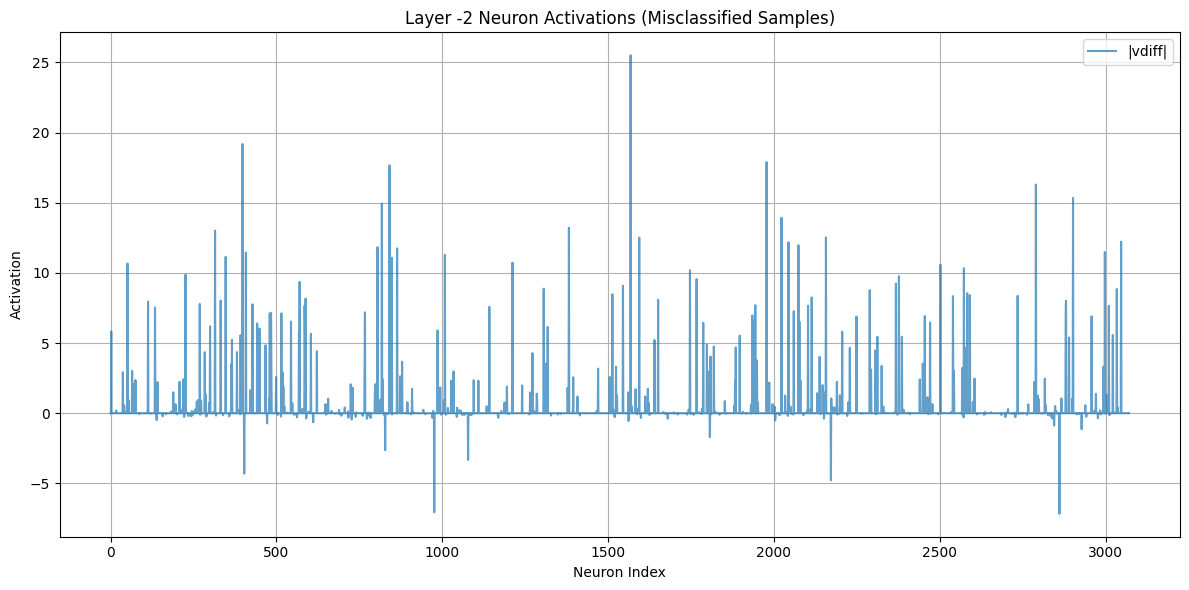

vdiff_layer min=-1.7721685929573692, max=27.064783167319465
vdiff_abs_layer min=-5.994323549786711, max=25.150946556758143


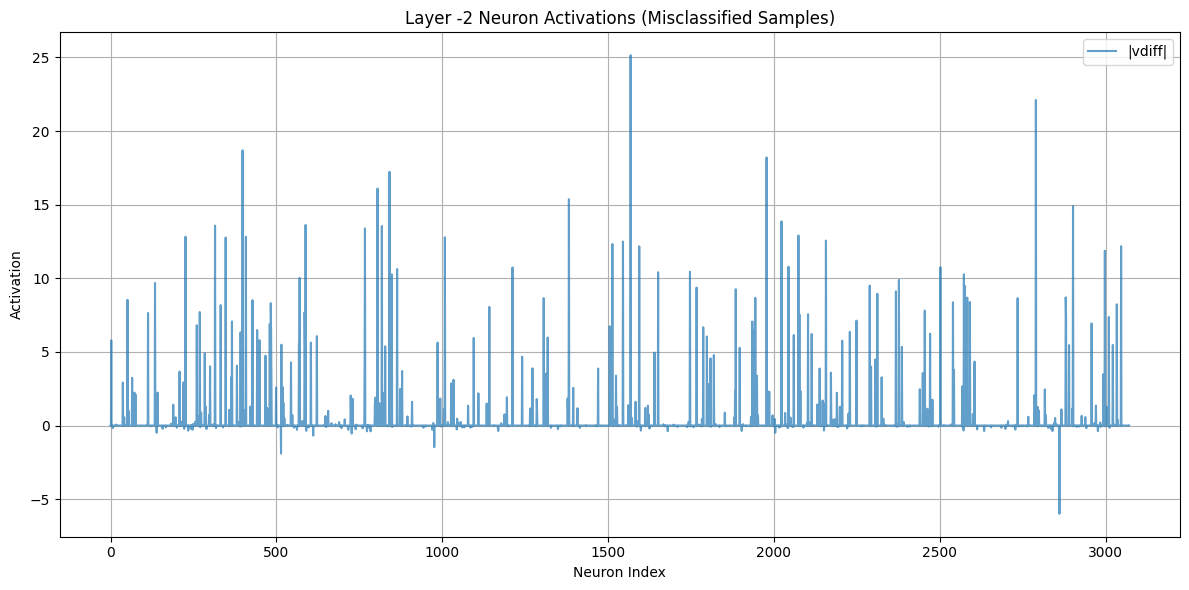

vdiff_layer min=-25.933567631517715, max=21.116217119378682
vdiff_abs_layer min=-14.983535357821124, max=21.514972547130878


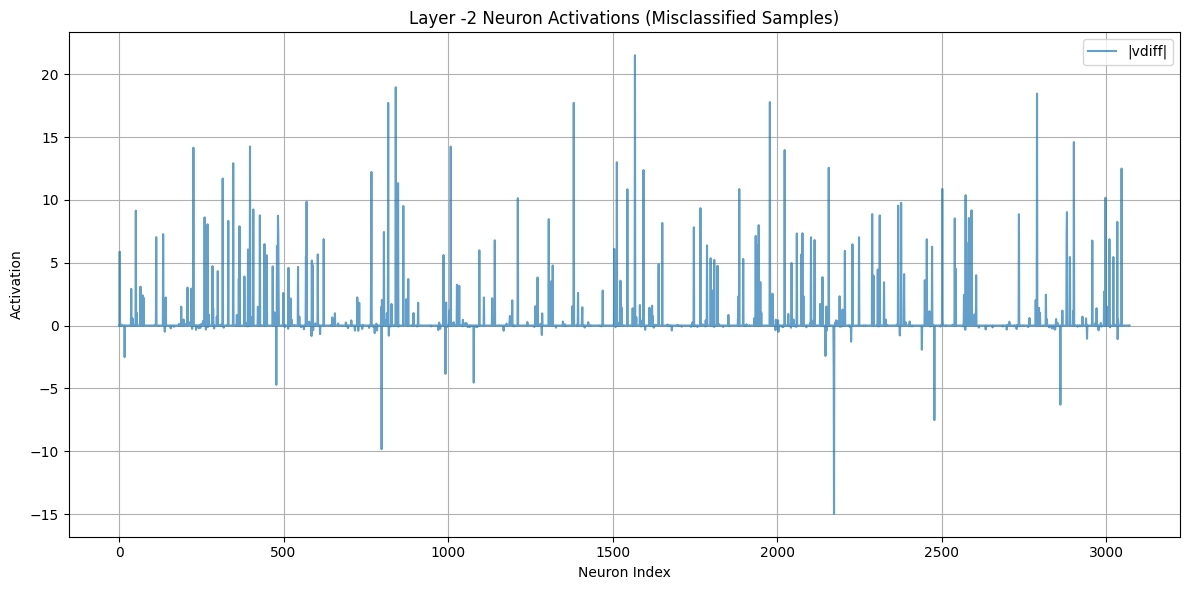

vdiff_layer min=-0.5425790138499507, max=27.5169225784202
vdiff_abs_layer min=-8.129688238975435, max=25.17848982853582


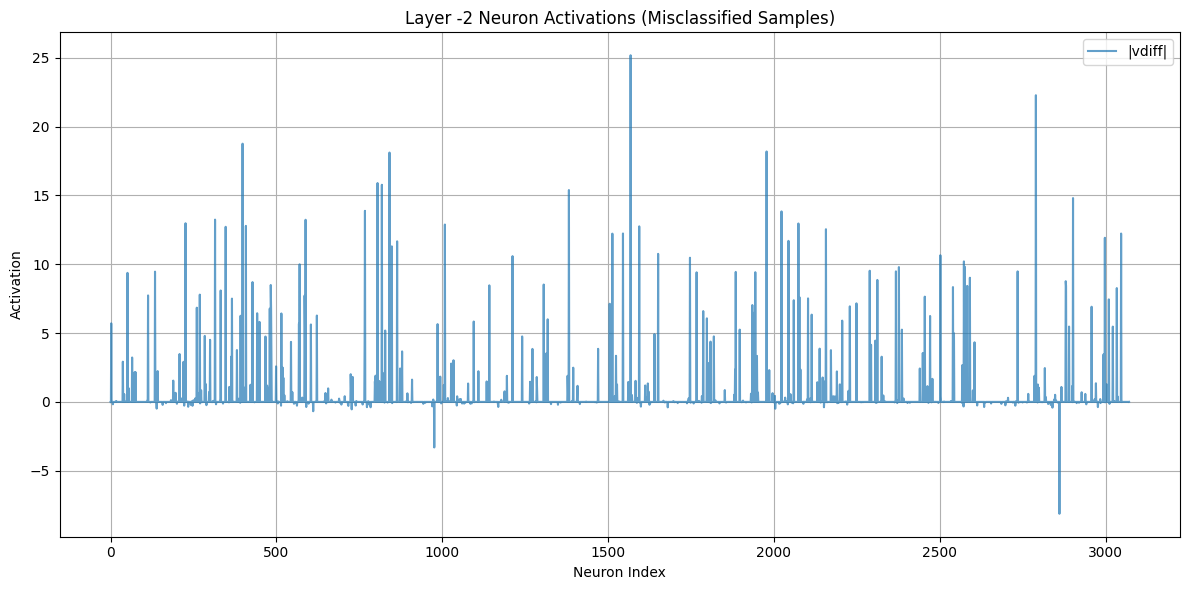

In [13]:
tgt_layer = -2

for tgt_rank in tgt_ranks:
    for misclf_type_raw in misclf_types:
        if isinstance(misclf_type_raw, tuple):
            misclf_type, fpfn = misclf_type_raw
        else:
            misclf_type, fpfn = misclf_type_raw, None
        vcor_abs = result_abs[(tgt_rank, misclf_type_raw, "cor")]
        vmis_abs = result_abs[(tgt_rank, misclf_type_raw, "mis")]
        vcor = result[(tgt_rank, misclf_type_raw, "cor")]
        vmis = result[(tgt_rank, misclf_type_raw, "mis")]
        
        # cor
        # vcor_abs_layer = vcor_abs[tgt_layer]
        # vcor_layer = vcor[tgt_layer]
        # # それぞれのmin, maxを表示
        # print(f"\ntgt_rank={tgt_rank}, misclf_type={misclf_type}, fpfn={fpfn}")
        # print(f"vcor_abs_layer min={np.min(vcor_abs_layer)}, max={np.max(vcor_abs_layer)}")
        # print(f"vcor_layer min={np.min(vcor_layer)}, max={np.max(vcor_layer)}")

        # # プロット
        # plt.figure(figsize=(12, 6))
        # plt.plot(vcor_abs_layer, label="|vcor|", alpha=0.7)
        # plt.plot(vcor_layer, label="vcor", alpha=0.7)
        # plt.xlabel("Neuron Index")
        # plt.ylabel("Activation")
        # plt.title(f"Layer {tgt_layer} Neuron Activations (Correct Samples)")
        # plt.legend()
        # plt.grid(True)
        # plt.tight_layout()
        # plt.show()
        
        # mis
        # vmis_abs_layer = vmis_abs[tgt_layer]
        # vmis_layer = vmis[tgt_layer]
        # # それぞれのmin, maxを表示
        # print(f"vmis_abs_layer min={np.min(vmis_abs_layer)}, max={np.max(vmis_abs_layer)}")
        # print(f"vmis_layer min={np.min(vmis_layer)}, max={np.max(vmis_layer)}")
        # # プロット
        # plt.figure(figsize=(12, 6))
        # plt.plot(vmis_abs_layer, label="|vmis|", alpha=0.7)
        # plt.plot(vmis_layer, label="vmis", alpha=0.7)
        # plt.plot(vmis_abs_layer-vmis_layer, label="diff", alpha=0.7)
        # plt.xlabel("Neuron Index")
        # plt.ylabel("Activation")
        # plt.title(f"Layer {tgt_layer} Neuron Activations (Misclassified Samples)")
        # plt.legend()
        # plt.grid(True)
        # plt.tight_layout()
        # plt.show()
        
        # cor - mis
        vcor_abs_layer = vcor_abs[tgt_layer]
        vcor_layer = vcor[tgt_layer]
        vmis_abs_layer = vmis_abs[tgt_layer]
        vmis_layer = vmis[tgt_layer]
        vdiff_layer = vcor_abs_layer - vmis_abs_layer
        vdiff_abs_layer = vcor_layer - vmis_layer
        # それぞれのmin, maxを表示
        print(f"vdiff_layer min={np.min(vdiff_layer)}, max={np.max(vdiff_layer)}")
        print(f"vdiff_abs_layer min={np.min(vdiff_abs_layer)}, max={np.max(vdiff_abs_layer)}")
        # プロット
        plt.figure(figsize=(12, 6))
        plt.plot(vdiff_abs_layer, label="|vdiff|", alpha=0.7)
        # plt.plot(vdiff_layer, label="vdiff", alpha=0.7)
        # plt.plot(vdiff_abs_layer-vmis_layer, label="diff", alpha=0.7)
        plt.xlabel("Neuron Index")
        plt.ylabel("Activation")
        plt.title(f"Layer {tgt_layer} Neuron Activations (Misclassified Samples)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()